In [1]:
import pandas as pd
import numpy as np
from tqdm import tqdm
import xml.etree.ElementTree as ET
import json
import requests
import urllib
import urllib.request
import datetime
import folium
import os
import datetime

import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf

In [2]:
#pip install folium

In [3]:

#pip install keras

# 주산지 선정 및 관측지점 mapping

## 2019년 데이터를 기준으로 주산지 선정

In [4]:
#filename_list = !ls ./data/public_data/train_AT_TSALET_ALL
#filename_list_2019 = []    
#for filename in filename_list :
#    if '2019' in filename :
#filename_list_2019.append(filename)
 #       
#path = 'data/public_data/train_AT_TSALET_ALL/
#df_list = []
#for filename in tqdm(filename_list_2019) :
#    df = pd.read_csv(path + filename)
#    df_list.append(df)
#data = pd.concat(df_list, sort=False).reset_index(drop=True)

In [5]:
df_list = []
test_file= os.listdir('data/public_data/train_AT_TSALET_ALL')
test_file_2019 = []
for filename in test_file:
    if "2019" in filename:
        test_file_2019.append(filename)
        
path = 'data/public_data/train_AT_TSALET_ALL/'
for filename in tqdm(test_file_2019) :
    df = pd.read_csv(path + filename)
    df_list.append(df)
data = pd.concat(df_list, sort=False).reset_index(drop=True)

100%|██████████████████████████████████████████████████████████████████████████████████| 12/12 [01:22<00:00,  6.85s/it]


In [6]:
data

,SALEDATE,WHSAL_NM,CMP_NM,PUM_NM,KIND_NM,DAN_NM,POJ_NM,SIZE_NM,LV_NM,SAN_NM,DANQ,QTY,COST,TOT_QTY,TOT_AMT
0,20190110,대구북부도매,대양청과,오이,가시오이,kg,상자,.,등외,경상북도 구미시,10.0,1.0,6000.0,10.0,6000.0
1,20190110,대구북부도매,대양청과,오이,가시오이,kg,상자,.,특,대구광역시 달성군,10.0,20.0,18000.0,200.0,360000.0
2,20190110,대구북부도매,대양청과,오이,가시오이,kg,상자,.,상,대구광역시 달성군,10.0,16.0,14500.0,160.0,232000.0
3,20190110,대구북부도매,대양청과,오이,가시오이,kg,상자,.,보통,대구광역시 달성군,10.0,12.0,11500.0,120.0,138000.0
4,20190110,대구북부도매,대양청과,오이,가시오이,kg,상자,.,4등,대구광역시 달성군,10.0,8.0,5500.0,80.0,44000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40436019,20191231,서울강서도매,강서청과,감귤,천헤향,kg,.,.,.,제주 서귀포시,3.0,-24.0,13000.0,-72.0,-312000.0
40436020,20191231,서울강서도매,강서청과,감귤,천헤향,kg,.,.,.,제주 서귀포시,3.0,-19.0,13000.0,-57.0,-247000.0
40436021,20191231,서울강서도매,강서청과,감귤,천헤향,kg,.,.,.,제주 서귀포시,3.0,4.0,13000.0,12.0,52000.0
40436022,20191231,서울강서도매,강서청과,감귤,천헤향,kg,.,.,.,제주 서귀포시,3.0,24.0,13000.0,72.0,312000.0


In [7]:
unique_pum = ['배추']

In [8]:
joosan_dict = dict()
for pum in tqdm(unique_pum) :
    pum_df = data[data['PUM_NM']==pum]
    joosan_list = pum_df.groupby(['SAN_NM'])['TOT_QTY'].sum().sort_values(ascending=False).index
    for i in range(10) :
        if joosan_list[i][-1] in ['군','구','도','시'] : # 국산만 골라내기
            joosan_dict[pum] = joosan_list[i]
            break

100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:07<00:00,  7.35s/it]


In [9]:
joosan_list

Index(['전라남도 해남군', '강원도 평창군', '전남 해남군', '강원도 강릉시', '강원 평창군', '전라남도 진도군',
       '강원도 영월군', '강원도 태백시', '경기 구리시', '강원도 횡성군',
       ...
       '서울 동작구', '서울 도봉구', '전남 구례군', '서울특별시 도봉구', '강원도 속초시', '미얀마', '경기도 성남시',
       '경상남도 창원시 마산회원구', '전라북도 군산시', '대구광역시 수성구'],
      dtype='object', name='SAN_NM', length=401)

In [10]:
joosan_dict

{'배추': '전라남도 해남군'}

In [11]:
#카카오 api를 활용한 전라남도 해남군 위경도 찾기

In [12]:
y = [] #위도
x = [] #경도

url = 'https://dapi.kakao.com/v2/local/search/address.json?query=' + '전라남도 해남군'
headers = {"Authorization": "KakaoAK dc8a516e770e6ff9b9390365a914adc0"}
result = json.loads(str(requests.get(url, headers=headers).text))
match_first = result['documents'][0]['address']
y.append(float(match_first['y'])) #위도
x.append(float(match_first['x'])) #경도
joosan_xy = pd.DataFrame({'SAN_NM' : joosan_dict.values(), 'y' : y, 'x' : x}).reset_index()

In [13]:
joosan_xy

,index,SAN_NM,y,x
0,0,전라남도 해남군,34.573517,126.59927


In [14]:
stn_info = pd.read_csv('RDA_SPOT_INFO.csv')
stn_info['관측시작일'] = pd.to_datetime(stn_info['관측시작일'])
stn_info = stn_info[stn_info['관측시작일'].dt.year<=2015]

In [15]:
stn_info

,도명,지점명,지점코드,위도,경도,고도,설치주소,관측시작일
0,경기도,가평군 가평읍,477802A001,37.84621,127.50063,80.0,경기도 가평군 가평읍 아랫마장길 59,2011-05-22
1,경기도,고양시 구산동,411801A001,37.67453,126.70070,24.0,경기도 고양시 일산서구 구산동 1942,2010-12-06
2,경기도,고양시 덕양구,412040A002,37.64918,126.87036,39.0,경기도 고양시 덕양구 고양대로 1695 (원흥동),2013-08-24
3,경기도,광주시 목현동,464030A001,37.43231,127.23394,91.0,경기도 광주시 이배재로 209-5,2010-11-01
4,경기도,김포시 월곶면,415743A001,37.69489,126.55614,43.0,경기도 김포시 월곶면 오리정로 13,2010-12-14
...,...,...,...,...,...,...,...,...
205,부산,부산시 강서구,618803A001,35.20937,128.96128,3.0,경남 부산시 강서구 대저1동 2038,2010-12-20
206,인천,옹진군 백령면,409911A001,37.95742,124.71063,11.0,인천광역시 옹진군 백령면 진촌리 2359-4,2014-12-18
207,인천,옹진군 영흥면,409871A001,37.25288,126.46034,11.0,인천광역시 옹진군 영흥면 영흥남로435번길 29,2012-05-26
208,울산,울산시 청량면,689861A001,35.52411,129.26704,51.0,울산광역시 울주군 청량면 청량천변로 211,2009-03-02


In [16]:
#주산지 농업기상관측 지점과 거리 기준으로 mapping하기
y_san = joosan_xy['y']
x_san = joosan_xy['x']
y_stn = stn_info['위도']
x_stn = stn_info['경도']
code_dict = dict()

for y_san, x_san, san_name in zip(joosan_xy['y'], joosan_xy['x'], joosan_xy['SAN_NM']) :
    min_distance = 1000 #임의로 초기값 설정
    for y_stn, x_stn, stn_code in zip(stn_info['위도'], stn_info['경도'], stn_info['지점코드']) :
        distance = ((y_san-y_stn)**2 + (x_san-x_stn)**2)**0.5 #거리
        if distance < min_distance :
            min_distance = distance 
            stn_nearby = str(stn_code)
    code_dict[san_name] = stn_nearby

In [17]:
code_dict

{'전라남도 해남군': '536824B002'}

In [18]:
#지점명, 위도, 경도 파악하기
stn_location = stn_info[['지점명','위도', '경도']]
san_location = joosan_xy

map = folium.Map(location = [36, 128], zoom_start =7)

# 농업기상관측지점 분포 (파랑)
for index in stn_location.index:
    stn_latitude = stn_location.loc[index,"위도"]
    stn_longtitude = stn_location.loc[index,"경도"]
    stn_tooltip = stn_location.loc[index,'지점명']
    folium.Marker([stn_latitude, stn_longtitude], popup = '('+str(stn_latitude)+', '+str(stn_longtitude)+')', tooltip = stn_tooltip, icon = folium.Icon(color = "green")).add_to(map) 

# 산지 분포 (빨강)    
for index in san_location.index:    
    san_latitude = san_location.loc[index,"y"]
    san_longtitude = san_location.loc[index,"x"]
    san_tooltip = san_location.loc[index,'SAN_NM']    
    folium.Marker([san_latitude, san_longtitude], popup = '('+str(san_latitude)+', '+str(san_longtitude)+')', tooltip = san_tooltip, icon = folium.Icon(color = 'red')).add_to(map)
    
map

In [19]:
# CropWeather_ServiceKey = open('CropWeather_ServiceKey.txt', 'r').read()
# year_list = ['2015','2016', '2017', '2018', '2019', '2020']
# month_list = ['01','02','03','04','05','06','07','08','09','10','11','12']
# weather = pd.DataFrame()
# first_run = 0
# code_list = code_dict.values() # 주산지에 mapping 된 지점에 대해서만 조회
# year_error, month_error, stn_code_error, url_error, f_obs_date_error = [],[],[],[],[]
# colname_dict = dict()

# for stn_code in tqdm(code_list) :
#     for year in year_list :
#         for month in month_list :
#             url = 'http://apis.data.go.kr/1390802/AgriWeather/WeatherObsrInfo/GnrlWeather/getWeatherMonDayList?'
#             params = {
#                 'serviceKey' : CropWeather_ServiceKey, #인증키
#                 'Page_No' : '1', # 페이지 번호
#                 'Page_Size' : '31', # 한 페이지 결과 수(1~100) (31일 이내 전체 표기)
#                 'search_Year' : year, # 관측년도
#                 'search_Month' : month, #관측월
#                 'obsr_Spot_Code' : stn_code # 관측지점코드
#             }

#             # url에 params 적용하기(붙이기)
#             for key, value in zip(params.keys(), params.values()):
#                 if key == 'serviceKey' :
#                     url = url + key +'=' + value
#                 else :
#                     url = url + '&' + key + '=' + value
            
#             try :
#                 response = urllib.request.urlopen(url).read()
#                 response_string = ET.fromstring(response)

#                 # response - header(0) / body(1) - ...items(3) - item(0) 
#                 items = response_string[1][3]

#                 if first_run == 0 :
#                     for i in items[0] :
#                         colname_dict[i.tag] = [] # {'no' : [], 'stn_Code' : [], ...} 
#                         first_run += 1

#                 # 일자별로 반복 실행
#                 num_days = len(items) #28 or 30 or 31
#                 for index in range(num_days) : 
#                     # 해당하는 리스트에 원소 넣기
#                     for i in items[index] :
#                         colname_dict[i.tag].append(i.text)
#             except :
#                 year_error.append(year)
#                 month_error.append(month)
#                 stn_code_error.append(stn_code)
#                 url_error.append(url)
#                 f_obs_date_error.append(stn_info[stn_info['지점코드']==stn_code].reset_index()['관측시작일'][0])
               
            
# # DataFrame에 값 채워넣기             
# for col in colname_dict.keys() :
#     weather[col] = colname_dict[col]

# # 에러 발생한 요청 모음    
# error = pd.DataFrame({'year': year_error, 
#                       'month': month_error,
#                       'stn_code': stn_code_error,
#                       'url': url_error,  
#                       '관측시작일': f_obs_date_error})

In [20]:
weather = pd.read_csv("weather.csv")

In [21]:
weather

,no,stn_Code,stn_Name,date,temp,max_Temp,min_Temp,hum,widdir,wind,rain,sun_Time,sun_Qy,condens_Time,gr_Temp,soil_Temp,soil_Wt
0,1,536824B002,해남군 옥천면,2015-01-01,-1.3,0.6,-2.9,80.0,295.2,2.3,0.8,NaN,7.8,NaN,NaN,3.36,25.9
1,1,330846A001,천안시 목천읍,2015-01-01,-6.2,-3.8,-8.3,NaN,NaN,0.0,0.0,NaN,NaN,1429.0,NaN,NaN,NaN
2,1,627911A001,밀양시 상남면,2015-01-01,-3.2,0.2,-7.2,40.1,282.7,2.9,0.0,516.0,11.0,0.0,NaN,2.20,28.5
3,1,539823A001,진도군 군내면,2015-01-01,-0.8,1.6,-2.8,79.2,257.0,3.5,1.5,217.0,8.2,652.0,NaN,5.02,30.6
4,1,590823A001,남원시 이백면,2015-01-01,-4.1,-1.3,-6.0,60.7,286.7,2.1,0.5,310.0,7.7,0.0,-4.3,2.16,20.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34258,31,590823A001,남원시 이백면,2020-12-31,-2.6,-0.3,-5.8,74.6,232.0,1.0,0.0,339.0,9.7,87.0,-2.6,7.23,22.8
34259,31,534833E001,무안군 청계면,2020-12-31,-3.7,0.9,-8.3,95.3,353.5,1.5,1.0,215.0,8.2,0.0,-1.2,2.50,18.6
34260,31,330846A001,천안시 목천읍,2020-12-31,-9.9,-4.2,-16.4,70.3,171.9,0.1,0.5,NaN,30.4,0.0,-10.4,1.03,13.3
34261,31,269811A001,철원군 동송읍,2020-12-31,-11.2,-5.5,-16.9,43.0,250.6,2.3,0.0,NaN,8.3,0.0,-5.7,-4.95,22.5


In [22]:
#중복 제거 
weather = weather.drop_duplicates().reset_index(drop=True)
weather

,no,stn_Code,stn_Name,date,temp,max_Temp,min_Temp,hum,widdir,wind,rain,sun_Time,sun_Qy,condens_Time,gr_Temp,soil_Temp,soil_Wt
0,1,536824B002,해남군 옥천면,2015-01-01,-1.3,0.6,-2.9,80.0,295.2,2.3,0.8,NaN,7.8,NaN,NaN,3.36,25.9
1,1,330846A001,천안시 목천읍,2015-01-01,-6.2,-3.8,-8.3,NaN,NaN,0.0,0.0,NaN,NaN,1429.0,NaN,NaN,NaN
2,1,627911A001,밀양시 상남면,2015-01-01,-3.2,0.2,-7.2,40.1,282.7,2.9,0.0,516.0,11.0,0.0,NaN,2.20,28.5
3,1,539823A001,진도군 군내면,2015-01-01,-0.8,1.6,-2.8,79.2,257.0,3.5,1.5,217.0,8.2,652.0,NaN,5.02,30.6
4,1,590823A001,남원시 이백면,2015-01-01,-4.1,-1.3,-6.0,60.7,286.7,2.1,0.5,310.0,7.7,0.0,-4.3,2.16,20.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34258,31,590823A001,남원시 이백면,2020-12-31,-2.6,-0.3,-5.8,74.6,232.0,1.0,0.0,339.0,9.7,87.0,-2.6,7.23,22.8
34259,31,534833E001,무안군 청계면,2020-12-31,-3.7,0.9,-8.3,95.3,353.5,1.5,1.0,215.0,8.2,0.0,-1.2,2.50,18.6
34260,31,330846A001,천안시 목천읍,2020-12-31,-9.9,-4.2,-16.4,70.3,171.9,0.1,0.5,NaN,30.4,0.0,-10.4,1.03,13.3
34261,31,269811A001,철원군 동송읍,2020-12-31,-11.2,-5.5,-16.9,43.0,250.6,2.3,0.0,NaN,8.3,0.0,-5.7,-4.95,22.5


In [23]:
weather_area = weather[weather['stn_Name'].str.contains('해남군')] ## df[조건식]

In [24]:
weather_area

,no,stn_Code,stn_Name,date,temp,max_Temp,min_Temp,hum,widdir,wind,rain,sun_Time,sun_Qy,condens_Time,gr_Temp,soil_Temp,soil_Wt
0,1,536824B002,해남군 옥천면,2015-01-01,-1.3,0.6,-2.9,80.0,295.2,2.3,0.8,NaN,7.8,NaN,NaN,3.36,25.9
23,2,536824B002,해남군 옥천면,2015-01-02,0.8,6.0,-5.3,72.0,292.0,1.7,0.8,NaN,7.9,NaN,NaN,3.49,26.9
36,3,536824B002,해남군 옥천면,2015-01-03,-1.0,6.0,-7.8,81.4,311.0,0.4,0.0,NaN,10.4,NaN,NaN,2.57,26.9
40,4,536824B002,해남군 옥천면,2015-01-04,3.2,11.7,-2.5,85.0,303.0,0.4,0.0,NaN,9.5,NaN,NaN,3.38,26.8
66,5,536824B002,해남군 옥천면,2015-01-05,5.3,12.6,-3.1,87.6,119.1,0.5,6.2,NaN,7.4,NaN,NaN,3.87,26.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34194,27,536824B002,해남군 옥천면,2020-12-27,4.5,6.2,0.4,90.2,149.0,0.0,10.5,0.0,1.8,NaN,NaN,5.51,NaN
34200,28,536824B002,해남군 옥천면,2020-12-28,3.9,13.2,-0.7,94.0,349.9,0.1,0.0,310.0,9.2,NaN,NaN,6.12,NaN
34218,29,536824B002,해남군 옥천면,2020-12-29,2.3,11.6,-1.3,94.6,299.1,1.1,3.0,122.0,5.0,NaN,NaN,5.86,NaN
34235,30,536824B002,해남군 옥천면,2020-12-30,-3.7,-0.8,-5.4,85.7,288.6,2.5,0.0,110.0,6.3,NaN,NaN,4.68,NaN


In [25]:
weather_area.describe()

,no,temp,max_Temp,min_Temp,hum,widdir,wind,rain,sun_Time,sun_Qy,condens_Time,gr_Temp,soil_Temp,soil_Wt
count,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,1269.000000,2190.000000,0.0,0.0,2190.000000,1473.000000
mean,15.720548,13.899224,19.844155,8.555388,80.367991,222.358950,0.712466,3.379132,325.170213,13.991370,NaN,NaN,15.404986,19.793754
std,8.798256,9.029477,9.108325,9.929379,11.109180,91.295953,0.500748,12.911656,219.172697,7.403326,NaN,NaN,8.119306,7.460222
min,1.000000,-7.300000,-4.100000,-14.100000,38.000000,2.900000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,1.030000,3.300000
25%,8.000000,5.800000,12.300000,-0.300000,72.925000,126.825000,0.400000,0.000000,113.000000,8.200000,NaN,NaN,7.810000,14.800000
50%,16.000000,14.400000,20.800000,8.100000,81.700000,286.500000,0.600000,0.000000,363.000000,13.100000,NaN,NaN,15.375000,20.100000
75%,23.000000,21.600000,27.400000,17.400000,88.300000,303.575000,0.900000,0.500000,498.000000,19.900000,NaN,NaN,22.702500,25.100000
max,31.000000,30.200000,38.100000,27.000000,99.900000,358.800000,4.300000,220.500000,719.000000,30.900000,NaN,NaN,30.610000,45.200000


In [26]:
weather_area.isnull().sum()

no                 0
stn_Code           0
stn_Name           0
date               0
temp               0
max_Temp           0
min_Temp           0
hum                0
widdir             0
wind               0
rain               0
sun_Time         921
sun_Qy             0
condens_Time    2190
gr_Temp         2190
soil_Temp          0
soil_Wt          717
dtype: int64

In [27]:
# dtype변환(object --> float)
for col in weather.columns[4:] :
    weather[col] = weather[col].astype(float)

In [28]:
first_date = datetime.datetime.strptime('2020-09-28', '%Y-%m-%d') - datetime.timedelta(360)
date_list = [] 
for delta in range(360) :
    date = first_date + datetime.timedelta(days = delta)
    date = datetime.datetime.strftime(date, '%Y-%m-%d')
    date_list.append(date)
date_df = pd.DataFrame({'date' : date_list})
train = pd.read_csv('data\\public_data\\train.csv')
train2 = pd.concat([date_df, train], sort = False).reset_index(drop=True) #2015~2020-09-28

In [29]:
def weather_feature(temp_df, train2, date_df, allweather, pum, joosan_dict, code_dict, quater_days=30, num_quaters=12) :
    # 2015년도 일자 추가
    temp_df = train2[['date',f'{pum}_거래량(kg)', f'{pum}_가격(원/kg)']]
    
    # 품종과 주산지 날씨 mapping
    joosanji = joosan_dict[pum]
    joosan_code = code_dict[joosanji]
    joosan_weather = allweather[allweather['stn_Code']==joosan_code].reset_index(drop=True)
    end_index = np.where(joosan_weather['date']=='2020-09-28')[0][0]
    joosan_weather = joosan_weather.iloc[:end_index+1] #2020-09-28 까지만 자르기
    temp_df = temp_df.merge(joosan_weather, on='date', how='left') # 배추 거래량 ,배추 가격

    # weather feature 추가
    col_list = temp_df.columns[6:]
    for num in range(1,num_quaters+1) :
        for index in range(360, len(temp_df)) :
            temp_quater_df = temp_df.iloc[index-quater_days*num : index-quater_days*(num-1)] #
            quater_temp = temp_quater_df['temp']
            temp_df.loc[index, f'rain_sum_{num}q'] = temp_quater_df['rain'].sum() # 누적 강수량
            temp_df.loc[index, f'heavy_rain_count_{num}q'] = np.where(temp_quater_df['rain']>90, 1, 0).sum() # 평균 강수량 90mm 이상 누적 일수
            temp_df.loc[index, f'low_temp_count_{num}q'] = np.where(quater_temp<10,1, 0).sum() # 일평균 기온 10도 이하 누적 일수
            temp_df.loc[index, f'middle_temp_count_{num}q'] = np.where(((quater_temp>15)&(quater_temp<25)), 1, 0).sum() # 일평균 기온 15~22도 누적 일수
            temp_df.loc[index, f'high_temp_count_{num}q'] = np.where(quater_temp>30, 1, 0).sum() # 일평균 기온 30도 이상 누적 일수
            for col in col_list :
                temp_df.loc[index, f'avg_{col}_{num}q'] = temp_quater_df[col].mean() # 각 기상 요소의 평균값
    
    drop_col_list = temp_df.columns[3:19]
    temp_df = temp_df.drop(drop_col_list, 1).reset_index(drop=True)
    temp_df = temp_df.iloc[360:].reset_index(drop=True)
    
    return temp_df

In [30]:
pum = '배추'
temp_df = train[['date',f'{pum}_거래량(kg)', f'{pum}_가격(원/kg)']]
weather_feature(temp_df, train2, date_df, weather, pum, joosan_dict, code_dict, quater_days=30, num_quaters=12)

,date,배추_거래량(kg),배추_가격(원/kg),rain_sum_1q,heavy_rain_count_1q,low_temp_count_1q,middle_temp_count_1q,high_temp_count_1q,avg_temp_1q,avg_max_Temp_1q,...,avg_hum_12q,avg_widdir_12q,avg_wind_12q,avg_rain_12q,avg_sun_Time_12q,avg_sun_Qy_12q,avg_condens_Time_12q,avg_gr_Temp_12q,avg_soil_Temp_12q,avg_soil_Wt_12q
0,2016-01-01,0.0,0.0,249.5,0.0,0.0,26.0,0.0,21.116667,26.186667,...,84.096667,242.513333,0.453333,0.300000,368.033333,13.353333,NaN,NaN,18.095667,23.143333
1,2016-01-02,80860.0,329.0,233.1,0.0,1.0,26.0,0.0,20.313333,25.496667,...,83.833333,248.693333,0.456667,0.300000,368.166667,13.246667,NaN,NaN,17.854667,22.576667
2,2016-01-03,0.0,0.0,232.6,0.0,2.0,26.0,0.0,19.596667,24.846667,...,83.846667,242.803333,0.433333,0.333333,377.433333,13.343333,NaN,NaN,17.633333,22.046667
3,2016-01-04,1422742.5,478.0,232.6,0.0,3.0,26.0,0.0,18.903333,24.323333,...,83.866667,249.310000,0.430000,0.333333,376.000000,13.273333,NaN,NaN,17.448000,21.543333
4,2016-01-05,1167241.0,442.0,232.6,0.0,4.0,26.0,0.0,18.240000,23.700000,...,83.596667,250.230000,0.416667,0.033333,390.700000,13.653333,NaN,NaN,17.257000,20.973333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1728,2020-09-24,1856965.0,1839.0,321.0,0.0,0.0,22.0,0.0,22.106667,26.833333,...,85.396667,229.063333,0.510000,8.550000,325.866667,12.590000,NaN,NaN,19.097333,25.236667
1729,2020-09-25,1880095.5,1789.0,321.5,0.0,0.0,23.0,0.0,21.826667,26.580000,...,85.076667,235.050000,0.513333,8.550000,332.766667,12.666667,NaN,NaN,18.831667,25.086667
1730,2020-09-26,1661090.9,1760.0,247.5,0.0,0.0,24.0,0.0,21.613333,26.530000,...,84.663333,241.140000,0.516667,7.800000,348.966667,13.020000,NaN,NaN,18.562000,24.650000
1731,2020-09-27,25396.0,3066.0,249.5,0.0,0.0,25.0,0.0,21.363333,26.390000,...,84.330000,247.706667,0.480000,0.450000,362.366667,13.396667,NaN,NaN,18.339000,23.843333


In [31]:
df_pk = temp_df.merge(weather_area, on='date', how='left')


In [32]:
df_pk

,date,배추_거래량(kg),배추_가격(원/kg),no,stn_Code,stn_Name,temp,max_Temp,min_Temp,hum,widdir,wind,rain,sun_Time,sun_Qy,condens_Time,gr_Temp,soil_Temp,soil_Wt
0,2016-01-01,0.0,0.0,1.0,536824B002,해남군 옥천면,1.8,9.5,-5.6,82.2,312.4,0.3,0.1,NaN,9.9,NaN,NaN,4.75,23.3
1,2016-01-02,80860.0,329.0,2.0,536824B002,해남군 옥천면,5.0,13.9,-1.5,88.3,121.5,0.2,0.0,NaN,5.5,NaN,NaN,5.39,23.3
2,2016-01-03,0.0,0.0,3.0,536824B002,해남군 옥천면,6.2,16.4,1.2,88.4,312.2,0.3,0.0,NaN,9.5,NaN,NaN,6.14,23.1
3,2016-01-04,1422742.5,478.0,4.0,536824B002,해남군 옥천면,6.3,12.2,-1.7,79.7,301.7,0.9,0.0,NaN,9.5,NaN,NaN,6.24,23.0
4,2016-01-05,1167241.0,442.0,5.0,536824B002,해남군 옥천면,1.7,4.3,-2.3,78.3,319.6,0.4,2.9,NaN,2.7,NaN,NaN,5.52,23.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1728,2020-09-24,1856965.0,1839.0,24.0,536824B002,해남군 옥천면,19.4,24.7,15.0,86.4,7.4,0.3,0.5,277.0,13.7,NaN,NaN,21.82,NaN
1729,2020-09-25,1880095.5,1789.0,25.0,536824B002,해남군 옥천면,19.7,26.4,13.9,87.6,314.2,0.4,0.0,381.0,16.7,NaN,NaN,22.06,NaN
1730,2020-09-26,1661090.9,1760.0,26.0,536824B002,해남군 옥천면,19.2,25.2,15.5,89.8,110.2,0.2,3.0,306.0,13.1,NaN,NaN,22.34,NaN
1731,2020-09-27,25396.0,3066.0,27.0,536824B002,해남군 옥천면,19.5,25.3,14.2,84.8,122.4,0.3,0.0,495.0,18.5,NaN,NaN,22.39,NaN


In [33]:
df_pekinensis = weather_feature(temp_df, train2, date_df, weather, pum, joosan_dict, code_dict, quater_days=30, num_quaters=12)

In [34]:
df_pekinensis.columns

Index(['date', '배추_거래량(kg)', '배추_가격(원/kg)', 'rain_sum_1q',
       'heavy_rain_count_1q', 'low_temp_count_1q', 'middle_temp_count_1q',
       'high_temp_count_1q', 'avg_temp_1q', 'avg_max_Temp_1q',
       ...
       'avg_hum_12q', 'avg_widdir_12q', 'avg_wind_12q', 'avg_rain_12q',
       'avg_sun_Time_12q', 'avg_sun_Qy_12q', 'avg_condens_Time_12q',
       'avg_gr_Temp_12q', 'avg_soil_Temp_12q', 'avg_soil_Wt_12q'],
      dtype='object', length=219)

In [35]:
df_pekinensis

,date,배추_거래량(kg),배추_가격(원/kg),rain_sum_1q,heavy_rain_count_1q,low_temp_count_1q,middle_temp_count_1q,high_temp_count_1q,avg_temp_1q,avg_max_Temp_1q,...,avg_hum_12q,avg_widdir_12q,avg_wind_12q,avg_rain_12q,avg_sun_Time_12q,avg_sun_Qy_12q,avg_condens_Time_12q,avg_gr_Temp_12q,avg_soil_Temp_12q,avg_soil_Wt_12q
0,2016-01-01,0.0,0.0,249.5,0.0,0.0,26.0,0.0,21.116667,26.186667,...,84.096667,242.513333,0.453333,0.300000,368.033333,13.353333,NaN,NaN,18.095667,23.143333
1,2016-01-02,80860.0,329.0,233.1,0.0,1.0,26.0,0.0,20.313333,25.496667,...,83.833333,248.693333,0.456667,0.300000,368.166667,13.246667,NaN,NaN,17.854667,22.576667
2,2016-01-03,0.0,0.0,232.6,0.0,2.0,26.0,0.0,19.596667,24.846667,...,83.846667,242.803333,0.433333,0.333333,377.433333,13.343333,NaN,NaN,17.633333,22.046667
3,2016-01-04,1422742.5,478.0,232.6,0.0,3.0,26.0,0.0,18.903333,24.323333,...,83.866667,249.310000,0.430000,0.333333,376.000000,13.273333,NaN,NaN,17.448000,21.543333
4,2016-01-05,1167241.0,442.0,232.6,0.0,4.0,26.0,0.0,18.240000,23.700000,...,83.596667,250.230000,0.416667,0.033333,390.700000,13.653333,NaN,NaN,17.257000,20.973333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1728,2020-09-24,1856965.0,1839.0,321.0,0.0,0.0,22.0,0.0,22.106667,26.833333,...,85.396667,229.063333,0.510000,8.550000,325.866667,12.590000,NaN,NaN,19.097333,25.236667
1729,2020-09-25,1880095.5,1789.0,321.5,0.0,0.0,23.0,0.0,21.826667,26.580000,...,85.076667,235.050000,0.513333,8.550000,332.766667,12.666667,NaN,NaN,18.831667,25.086667
1730,2020-09-26,1661090.9,1760.0,247.5,0.0,0.0,24.0,0.0,21.613333,26.530000,...,84.663333,241.140000,0.516667,7.800000,348.966667,13.020000,NaN,NaN,18.562000,24.650000
1731,2020-09-27,25396.0,3066.0,249.5,0.0,0.0,25.0,0.0,21.363333,26.390000,...,84.330000,247.706667,0.480000,0.450000,362.366667,13.396667,NaN,NaN,18.339000,23.843333


In [36]:
###########훈련 시작


In [37]:
df_pk.shape

(1733, 19)

In [38]:
import tensorflow as tf

In [39]:
df_pk.head()

,date,배추_거래량(kg),배추_가격(원/kg),no,stn_Code,stn_Name,temp,max_Temp,min_Temp,hum,widdir,wind,rain,sun_Time,sun_Qy,condens_Time,gr_Temp,soil_Temp,soil_Wt
0,2016-01-01,0.0,0.0,1.0,536824B002,해남군 옥천면,1.8,9.5,-5.6,82.2,312.4,0.3,0.1,NaN,9.9,NaN,NaN,4.75,23.3
1,2016-01-02,80860.0,329.0,2.0,536824B002,해남군 옥천면,5.0,13.9,-1.5,88.3,121.5,0.2,0.0,NaN,5.5,NaN,NaN,5.39,23.3
2,2016-01-03,0.0,0.0,3.0,536824B002,해남군 옥천면,6.2,16.4,1.2,88.4,312.2,0.3,0.0,NaN,9.5,NaN,NaN,6.14,23.1
3,2016-01-04,1422742.5,478.0,4.0,536824B002,해남군 옥천면,6.3,12.2,-1.7,79.7,301.7,0.9,0.0,NaN,9.5,NaN,NaN,6.24,23.0
4,2016-01-05,1167241.0,442.0,5.0,536824B002,해남군 옥천면,1.7,4.3,-2.3,78.3,319.6,0.4,2.9,NaN,2.7,NaN,NaN,5.52,23.8


In [40]:
#뉴럴네트워크 모델을 훈련하는데 사용할 특정한 시간 윈도우의 데이터를 얻기 위해 아래의 함수를 사용합니다.
# history_size는 과거 데이터의 크기를 의미합니다.
# target_size는 모델이 얼마 동안의 미래를 예측할지를 의미합니다.

In [41]:
#univeriate = > 단변량 예측
#전략1 : baseline 예측
#전략2 : simple lstm예측

#multivariate => 다변량 예측
#one-step => 하루날짜 타겟 예측
# multi-step => 여러 날자 타겟예측

In [42]:
def univariate_data(dataset, start_index, end_index, history_size, target_size):
    data = []
    labels = []

    start_index = start_index + history_size
    if end_index is None:
        end_index = len(dataset) - target_size

    for i in range(start_index, end_index):
        indices = range(i - history_size, i)
        # Reshape data from (history_size,) to (history_size, 1)
        data.append(np.reshape(dataset[indices], (history_size, 1)))
        labels.append(dataset[i+target_size])
    return np.array(data), np.array(labels)

In [43]:
TRAIN_SPLIT = 1000
tf.random.set_seed(10)

In [44]:
import matplotlib.pyplot as plt

In [45]:
# df_pk에서 배추 거래량으로 데이터 예측하기

uni_data = df_pk['배추_거래량(kg)']
uni_data.index = df_pk['date']
print(uni_data.head())

date
2016-01-01          0.0
2016-01-02      80860.0
2016-01-03          0.0
2016-01-04    1422742.5
2016-01-05    1167241.0
Name: 배추_거래량(kg), dtype: float64


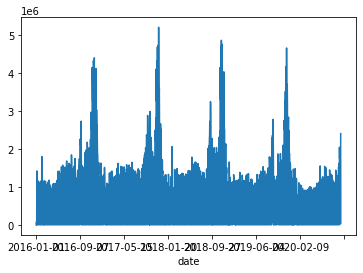

In [46]:
uni_data.plot(subplots=True)
plt.show()

In [47]:
#표준화 평균을 빼고 표준편차를 나누어준다.
uni_data = uni_data.values
uni_train_mean = uni_data[:TRAIN_SPLIT].mean()
uni_train_std = uni_data[:TRAIN_SPLIT].std()
uni_data = (uni_data - uni_train_mean) / uni_train_std  # Standardization

print(uni_data)

[-1.36131432 -1.2654601  -1.36131432 ...  0.60779977 -1.33120903
  1.48971665]


In [48]:
#이제 단변량 모델을 위한 데이터를 생성합니다.
#우선 20개의 관측치를 입력하면 다음 시간 스텝의 생산량을 예측하도록 합니다.
univariate_past_history = 365
univariate_future_target = 0

x_train_uni, y_train_uni = univariate_data(uni_data, 0, TRAIN_SPLIT,
                                         univariate_past_history,
                                         univariate_future_target)
x_val_uni, y_val_uni = univariate_data(uni_data, TRAIN_SPLIT, None,
                                     univariate_past_history,
                                     univariate_future_target)

print('Single window of past history')
print(x_train_uni[0])
print('\n Target temperature to predict')
print(y_train_uni[0])

Single window of past history
[[-1.36131432e+00]
 [-1.26546010e+00]
 [-1.36131432e+00]
 [ 3.25253411e-01]
 [ 2.23731744e-02]
 [-1.21933889e-01]
 [-1.28551576e-01]
 [-2.43858769e-01]
 [-5.44406663e-01]
 [-1.36131432e+00]
 [ 1.50080712e-02]
 [-4.95401877e-01]
 [-5.99490238e-01]
 [-4.39703299e-01]
 [-4.20488476e-01]
 [-7.23749711e-01]
 [-1.36131432e+00]
 [-2.67571493e-02]
 [-6.25882746e-01]
 [-7.62127198e-01]
 [-8.45284108e-01]
 [-6.98953153e-01]
 [-5.71350399e-01]
 [-1.36131432e+00]
 [-5.59896733e-01]
 [-4.64361992e-01]
 [-2.06437572e-01]
 [-1.31939547e-01]
 [ 1.71814464e-02]
 [-4.75937165e-01]
 [-1.36068841e+00]
 [ 7.76906242e-01]
 [ 1.66943997e-01]
 [-9.59278322e-02]
 [ 6.23981774e-02]
 [-8.52328441e-02]
 [-8.43872256e-01]
 [-1.35747351e+00]
 [-1.36131432e+00]
 [-1.36131432e+00]
 [-1.36127638e+00]
 [-5.61926908e-01]
 [-3.84658132e-01]
 [-8.11707749e-01]
 [-1.36131432e+00]
 [ 1.59036668e-02]
 [-3.40295033e-01]
 [-9.59829549e-02]
 [-1.96187596e-01]
 [-4.38432878e-02]
 [-5.01683612e-01]
 

In [49]:
# create_time_steps() 함수는 데이터의 길이를 이용해서 시간 스텝 값들을 만듭니다.
# show_plot() 함수는 이 온도 데이터들을 matplotlib 그래프로 반환합니다.

In [50]:
def create_time_steps(length):
    return list(range(-length, 0))


def show_plot(plot_data, delta, title):
    labels = ['History', 'True Future', 'Model Prediction']
    marker = ['.-', 'rx', 'go']
    time_steps = create_time_steps(plot_data[0].shape[0])
    if delta:
        future = delta
    else:
        future = 0

    plt.title(title)
    for i, x in enumerate(plot_data):
        if i:
            plt.plot(future, plot_data[i], marker[i], markersize=10, label=labels[i])
        else:
            plt.plot(time_steps, plot_data[i].flatten(), marker[i], label=labels[i])
    plt.legend()
    plt.axis('auto')
    plt.xlim([time_steps[0], (future+5)*2])
    plt.xlabel('Time-Step')
    return plt

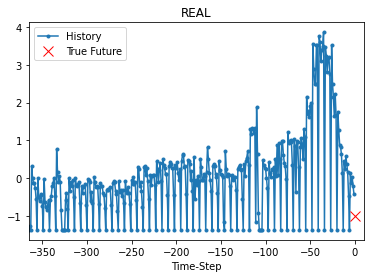

In [51]:
show_plot([x_train_uni[0], y_train_uni[0]], 0, 'REAL').show()

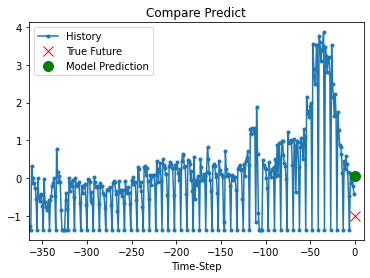

In [52]:
def baseline(history):
    return np.mean(history)


show_plot([x_train_uni[0], y_train_uni[0], baseline(x_train_uni[0])], 0, 'Compare Predict').show()

In [53]:
BATCH_SIZE = 600
BUFFER_SIZE = 2000
train_univariate = tf.data.Dataset.from_tensor_slices((x_train_uni, y_train_uni))
train_univariate = train_univariate.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE).repeat()

val_univariate = tf.data.Dataset.from_tensor_slices((x_val_uni, y_val_uni))
val_univariate = val_univariate.batch(BATCH_SIZE).repeat()

In [54]:
#LSTM으로 구현하기

In [55]:
simple_lstm_model = tf.keras.models.Sequential([
    tf.keras.layers.LSTM(8, input_shape=x_train_uni.shape[-2:]),
    tf.keras.layers.Dense(1)
])

simple_lstm_model.compile(optimizer='adam', loss='mae')

In [56]:
EVALUATION_INTERVAL = 200
EPOCHS = 10

simple_lstm_model.fit(train_univariate, epochs=EPOCHS,
                      steps_per_epoch=EVALUATION_INTERVAL,
                      validation_data=val_univariate, validation_steps=50)

Epoch 1/10
200/200 [==============================] - 25s 121ms/step - loss: 0.5778 - val_loss: 0.4680
Epoch 2/10
200/200 [==============================] - 22s 109ms/step - loss: 0.5369 - val_loss: 0.4408
Epoch 3/10
200/200 [==============================] - 22s 111ms/step - loss: 0.5035 - val_loss: 0.4571
Epoch 4/10
200/200 [==============================] - 22s 110ms/step - loss: 0.4756 - val_loss: 0.4459
Epoch 5/10
200/200 [==============================] - 22s 112ms/step - loss: 0.4449 - val_loss: 0.4281
Epoch 6/10
200/200 [==============================] - 22s 112ms/step - loss: 0.4180 - val_loss: 0.4200
Epoch 7/10
200/200 [==============================] - 22s 110ms/step - loss: 0.3982 - val_loss: 0.4132
Epoch 8/10
200/200 [==============================] - 23s 114ms/step - loss: 0.3792 - val_loss: 0.4037
Epoch 9/10
200/200 [==============================] - 22s 109ms/step - loss: 0.3637 - val_loss: 0.3879
Epoch 10/10
200/200 [==============================] - 24s 118ms/step - l

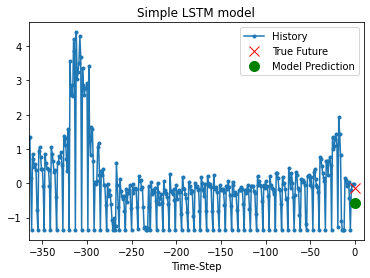

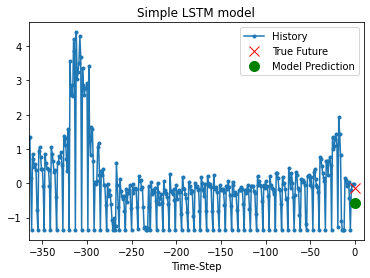

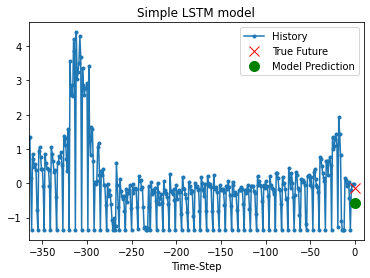

In [57]:
for x, y in val_univariate.take(3):
    plot = show_plot([x[0].numpy(), y[0].numpy(),
                      simple_lstm_model.predict(x)[0]], 0, 'Simple LSTM model')
    plot.show()

In [58]:
df_pk.columns

Index(['date', '배추_거래량(kg)', '배추_가격(원/kg)', 'no', 'stn_Code', 'stn_Name',
       'temp', 'max_Temp', 'min_Temp', 'hum', 'widdir', 'wind', 'rain',
       'sun_Time', 'sun_Qy', 'condens_Time', 'gr_Temp', 'soil_Temp',
       'soil_Wt'],
      dtype='object')

In [59]:
#다변량 데이터로 예측

In [60]:
df_pk = pd.read_excel("df_pk.xlsx")

In [61]:
features_considered = ['배추_거래량(kg)', '배추_가격(원/kg)', 'min_Temp', 'rain']
features = df_pk[features_considered]
features.index = df_pk['date']
print(features.head())

            배추_거래량(kg)  배추_가격(원/kg)  min_Temp  rain
date                                               
2016-01-01         0.0            0      -5.6   0.1
2016-01-02     80860.0          329      -1.5   0.0
2016-01-03         0.0            0       1.2   0.0
2016-01-04   1422742.5          478      -1.7   0.0
2016-01-05   1167241.0          442      -2.3   2.9


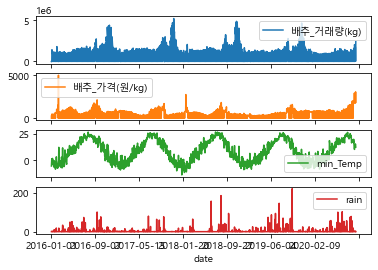

In [62]:
plt.rcParams['font.family'] = 'Malgun Gothic'
features.plot(subplots=True)
plt.show()

In [63]:
features = features.astype(float)

In [64]:
features.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1733 entries, 2016-01-01 to 2020-09-28
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   배추_거래량(kg)   1733 non-null   float64
 1   배추_가격(원/kg)  1733 non-null   float64
 2   min_Temp     1733 non-null   float64
 3   rain         1733 non-null   float64
dtypes: float64(4)
memory usage: 67.7+ KB


In [65]:
BATCH_SIZE = 10  # 몇 개의 샘플로 가중치를 결정할 것인지
BUFFER_SIZE = 50
EVALUATION_INTERVAL = 200
EPOCHS = 10 # 전체 데이터 셋을 몇번 반복할 것인지

In [66]:
TRAIN_SPLIT = 1000
tf.random.set_seed(10)

In [67]:
#Z-score 표준화
dataset = features.values
data_mean = dataset[:TRAIN_SPLIT].mean(axis=0)
data_std = dataset[:TRAIN_SPLIT].std(axis=0)
dataset = (dataset-data_mean)/data_std


In [68]:
dataset

array([[-1.36131432, -1.49449118, -1.42826362, -0.23803998],
       [-1.2654601 , -0.6825534 , -1.03501395, -0.24645962],
       [-1.36131432, -1.49449118, -0.77604465, -0.24645962],
       ...,
       [ 0.60779977,  2.84900578,  0.59553346,  0.0061295 ],
       [-1.33120903,  6.07207795,  0.47084454, -0.24645962],
       [ 1.48971665,  3.11307065,  0.3077898 , -0.24645962]])

In [69]:
def multivariate_data(dataset, target, start_index, end_index, history_size,
                      target_size, step, single_step=False):
  data = []
  labels = []

  start_index = start_index + history_size
  if end_index is None:
    end_index = len(dataset) - target_size

  for i in range(start_index, end_index):
    indices = range(i-history_size, i, step)
    data.append(dataset[indices])

    if single_step:
      labels.append(target[i+target_size])
    else:
      labels.append(target[i:i+target_size])

  return np.array(data), np.array(labels)

In [70]:
past_history = 365
future_target = 7
STEP = 1

x_train_single, y_train_single = multivariate_data(dataset, dataset[:, 1], 0,
                                                   TRAIN_SPLIT, past_history,
                                                   future_target, STEP,
                                                   single_step=True)
x_val_single, y_val_single = multivariate_data(dataset, dataset[:, 1],TRAIN_SPLIT, 
                                               None, past_history,
                                               future_target, STEP,
                                               single_step=True)

In [71]:
print('Single window of past history : {}'.format(x_train_single[0].shape))

Single window of past history : (365, 4)


In [72]:
# Use Customizing Function
train_data_single = tf.data.Dataset.from_tensor_slices((x_train_single, y_train_single))
train_data_single = train_data_single.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE).repeat()
# Dataset -> Tensor
val_data_single = tf.data.Dataset.from_tensor_slices((x_val_single, y_val_single))
val_data_single = val_data_single.batch(BATCH_SIZE).repeat()
# Build the Single Step Model
single_step_model = tf.keras.models.Sequential()
single_step_model.add(tf.keras.layers.LSTM(32, input_shape=x_train_single.shape[-2:]))
single_step_model.add(tf.keras.layers.Dense(1))
single_step_model.compile(optimizer=tf.keras.optimizers.RMSprop(), loss='mae')

for x, y in val_data_single.take(1):
    print(single_step_model.predict(x).shape)



(10, 1)


In [73]:
BATCH_SIZE = 10  # 몇 개의 샘플로 가중치를 결정할 것인지
BUFFER_SIZE = 50
EVALUATION_INTERVAL = 100 # 10던계 훈련
EPOCHS = 50 # 전체 데이터 셋을 몇번 반복할 것인지

Epoch 1/50
100/100 [==============================] - 7s 58ms/step - loss: 0.4833 - val_loss: 0.5376
Epoch 2/50
100/100 [==============================] - 6s 58ms/step - loss: 0.4413 - val_loss: 0.5700
Epoch 3/50
100/100 [==============================] - 6s 58ms/step - loss: 0.4103 - val_loss: 0.6302
Epoch 4/50
100/100 [==============================] - 6s 60ms/step - loss: 0.4054 - val_loss: 0.6539
Epoch 5/50
100/100 [==============================] - 6s 55ms/step - loss: 0.3948 - val_loss: 0.6976
Epoch 6/50
100/100 [==============================] - 5s 54ms/step - loss: 0.4025 - val_loss: 0.6639
Epoch 7/50
100/100 [==============================] - 6s 56ms/step - loss: 0.3861 - val_loss: 0.7223
Epoch 8/50
100/100 [==============================] - 6s 55ms/step - loss: 0.3786 - val_loss: 0.7289
Epoch 9/50
100/100 [==============================] - 5s 55ms/step - loss: 0.3894 - val_loss: 0.6863
Epoch 10/50
100/100 [==============================] - 5s 54ms/step - loss: 0.3739 - val_lo

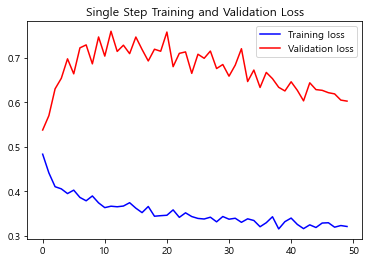

In [74]:
# Train the Model
single_step_history = single_step_model.fit(train_data_single, epochs=EPOCHS,
                                            steps_per_epoch=EVALUATION_INTERVAL,
                                            validation_data=val_data_single,
                                            validation_steps=10)


def plot_train_history(history, title):
    plt.rcParams['font.family'] = 'Malgun Gothic'
    loss = history.history['loss']
    val_loss = history.history['val_loss']
 
    epochs = range(len(loss))

    plt.figure()

    plt.plot(epochs, loss, 'b', label='Training loss') # 지금 데이터에 얼마나 잘맞는지
    plt.plot(epochs, val_loss, 'r', label='Validation loss') # 새 데이터에 얼마나 잘맛는지

    plt.title(title)
    plt.legend()

    plt.show()

plot_train_history(single_step_history,
                   'Single Step Training and Validation Loss')

C:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


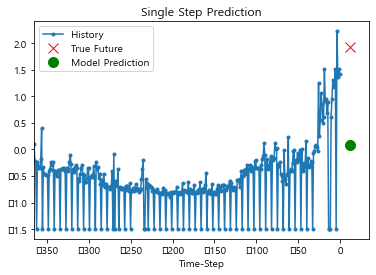

C:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


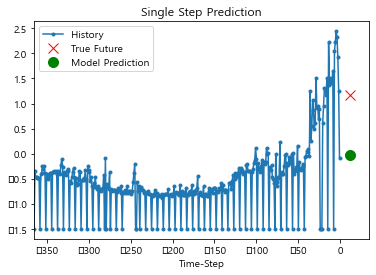

C:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


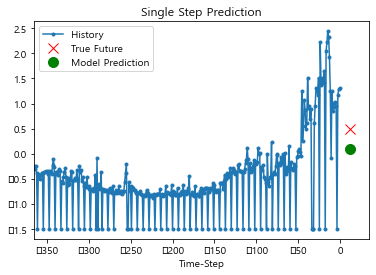

C:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


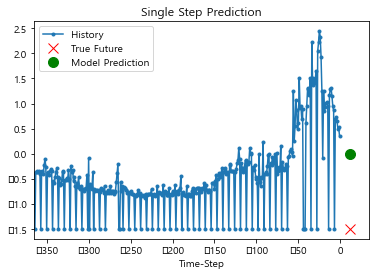

In [75]:
for x, y in val_data_single.take(4):
    plot = show_plot([x[0][:, 1].numpy(), y[0].numpy(),
                      single_step_model.predict(x)[0]], 12,
                     'Single Step Prediction')
    plt.rcParams['font.family'] = 'Malgun Gothic'
    plot.show()

In [76]:
past_history = 365
future_target = 31
STEP = 1

x_train_multi, y_train_multi = multivariate_data(dataset, dataset[:, 1], 0,
                                                 TRAIN_SPLIT, past_history, future_target, STEP)
x_val_multi, y_val_multi = multivariate_data(dataset, dataset[:, 1],
                                             TRAIN_SPLIT, None, past_history, future_target, STEP)

print('Single window of past history : {}'.format(x_train_multi[0].shape)) # 365일 24시간
print('\n Target temperature to predict : {}'.format(y_train_multi[0].shape)) # 31일 예측 데이터

Single window of past history : (365, 4)

 Target temperature to predict : (31,)


In [77]:
train_data_multi = tf.data.Dataset.from_tensor_slices((x_train_multi, y_train_multi))
train_data_multi = train_data_multi.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE).repeat()

val_data_multi = tf.data.Dataset.from_tensor_slices((x_val_multi, y_val_multi))
val_data_multi = val_data_multi.batch(BATCH_SIZE).repeat()

In [78]:
def multi_step_plot(history, true_future, prediction):
    plt.figure(figsize=(12,6))
    num_in = create_time_steps(len(history))
    num_out = len(true_future)
    
    plt.plot(num_in, np.array(history[:,1]), label='History')
    plt.plot(np.arange(num_out)/STEP, np.array(true_future),'bo', label='True Future')
    
    if prediction.any():
        plt.plot(np.arange(num_out)/STEP, np.array(prediction), 'ro', label='Predicted Future')
    plt.legend(loc='upper left')
    plt.show()

C:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


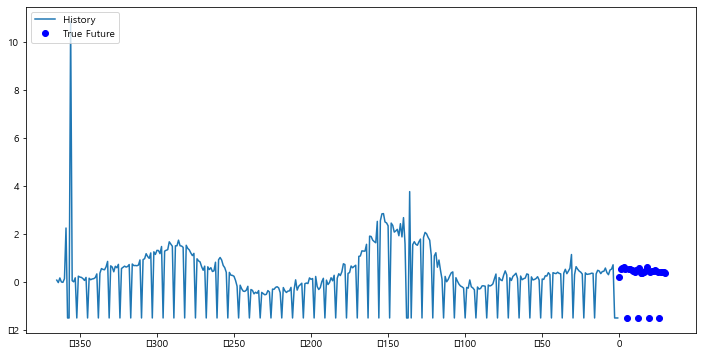

In [79]:
for x, y in train_data_multi.take(1):
    multi_step_plot(x[0], y[0], np.array([0]))

In [80]:
multi_step_model = tf.keras.models.Sequential()
multi_step_model.add(tf.keras.layers.LSTM(32,
                                         return_sequences = True,
                                         input_shape=x_train_multi.shape[-2:]))
multi_step_model.add(tf.keras.layers.LSTM(16, activation='relu'))
multi_step_model.add(tf.keras.layers.Dense(31))

multi_step_model.compile(optimizer=tf.keras.optimizers.RMSprop(clipvalue=1.0), loss='mae')

In [81]:
for x,y in val_data_multi.take(1):
    print(multi_step_model.predict(x).shape)

(10, 31)


In [82]:
BATCH_SIZE = 10  # 몇 개의 샘플로 가중치를 결정할 것인지   # 몇 문항을 풀고해답을 마추는지
BUFFER_SIZE = 50
EVALUATION_INTERVAL = 100                                 
EPOCHS = 50 # 전체 데이터 셋을 몇번 반복할 것인지        

In [83]:
multi_step_history = multi_step_model.fit(train_data_multi, epochs=EPOCHS,
                                          steps_per_epoch=EVALUATION_INTERVAL,
                                          validation_data=val_data_multi,
                                          validation_steps=10)
                                         

# steps_per_epoch : 한 epoch에 사용한 스텝 수를 지정합니다. 총 1000개의 훈련 샘플이 있고 배치사이즈가 10이므로 100스텝으로 지정합니다. = 검증 sample
# epochs : 전체 훈련 데이터셋에 대해 학습 반복 횟수를 지정합니다. 100번을 반복적으로 학습시켜 보겠습니다.
# validation_data : 검증데이터셋을 제공할 제네레이터를 지정합니다. 
# validation_steps : 한 epoch 종료 시 마다 검증할 때 사용되는 검증 스텝 수를 지정합니다. 홍 100개의 검증 샘플이 있고 배치사이즈가 10이므로 10스텝으로 지정합니다.

Epoch 1/50
100/100 [==============================] - 12s 110ms/step - loss: 0.6158 - val_loss: 0.6189
Epoch 2/50
100/100 [==============================] - 11s 107ms/step - loss: 0.5091 - val_loss: 0.6357
Epoch 3/50
100/100 [==============================] - 11s 108ms/step - loss: 0.4798 - val_loss: 0.6397
Epoch 4/50
100/100 [==============================] - 11s 108ms/step - loss: 0.4541 - val_loss: 0.6678
Epoch 5/50
100/100 [==============================] - 11s 108ms/step - loss: 0.4381 - val_loss: 0.6821
Epoch 6/50
100/100 [==============================] - 11s 108ms/step - loss: 0.4399 - val_loss: 0.6701
Epoch 7/50
100/100 [==============================] - 11s 108ms/step - loss: 0.4093 - val_loss: 0.6896
Epoch 8/50
100/100 [==============================] - 11s 108ms/step - loss: 0.4058 - val_loss: 0.6605
Epoch 9/50
100/100 [==============================] - 11s 108ms/step - loss: 0.4040 - val_loss: 0.6518
Epoch 10/50
100/100 [==============================] - 11s 107ms/step - l

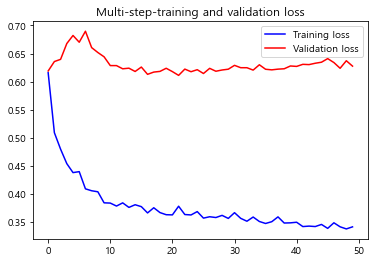

In [84]:
plot_train_history(multi_step_history, "Multi-step-training and validation loss")

C:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


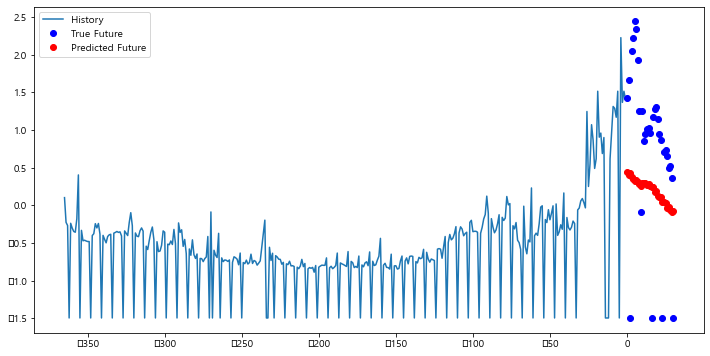

C:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


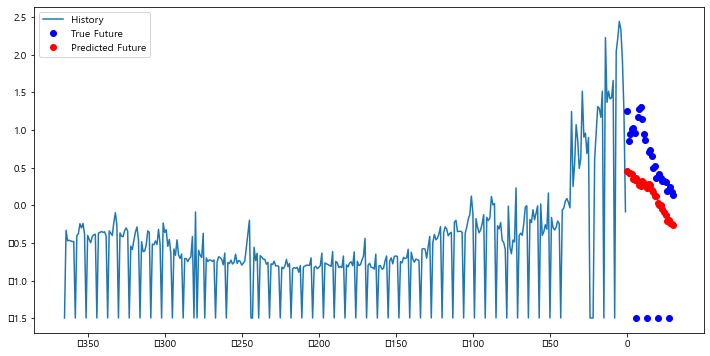

C:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


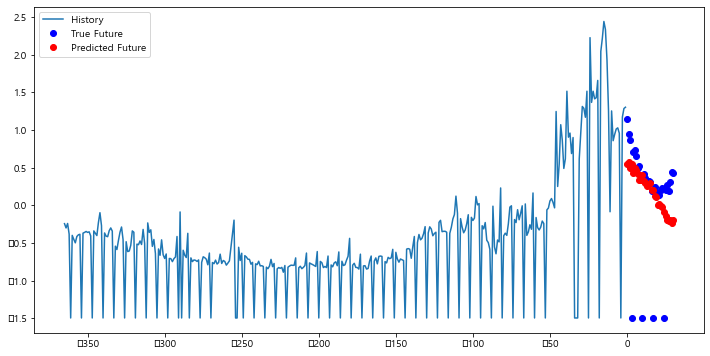

C:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


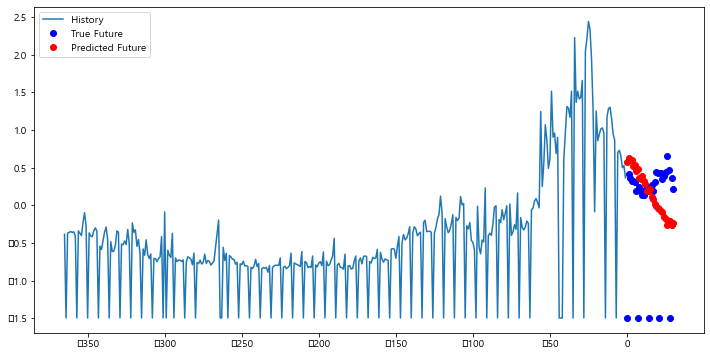

C:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


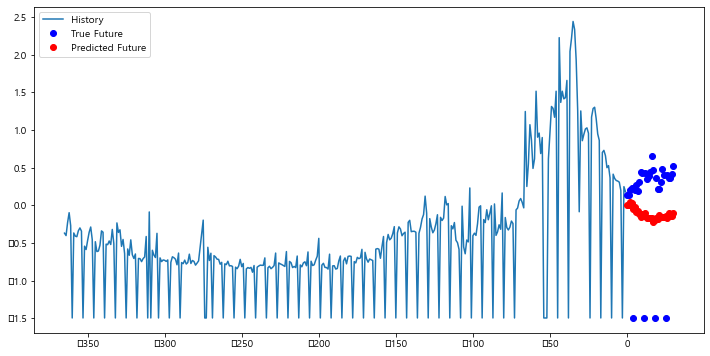

C:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


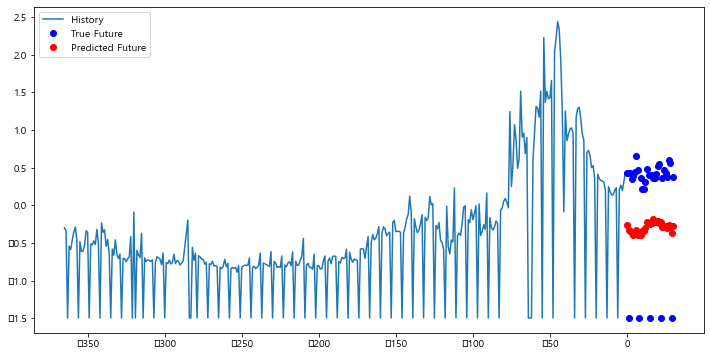

C:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


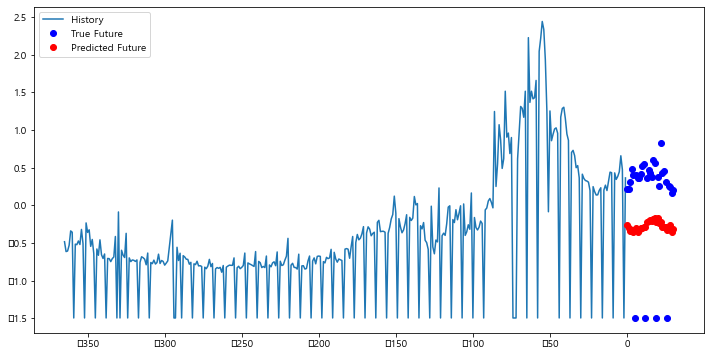

C:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


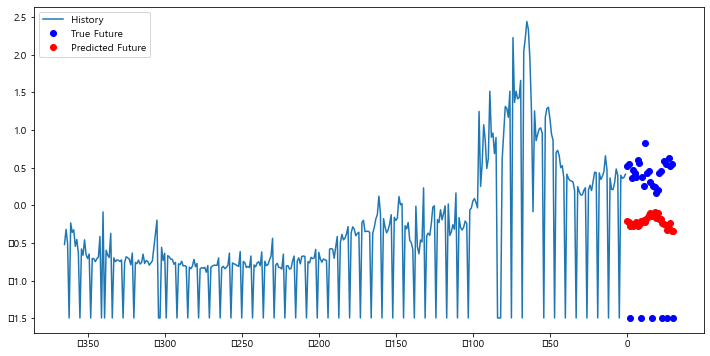

C:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


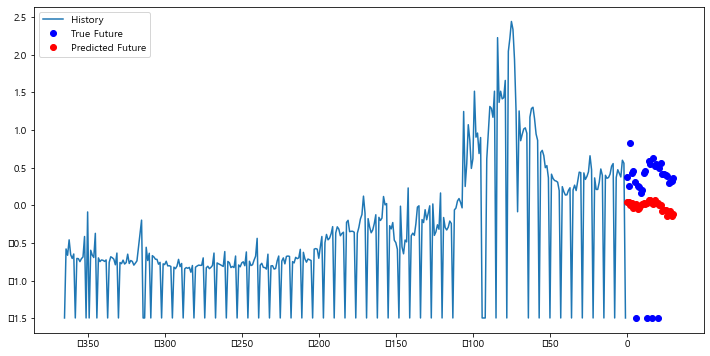

C:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


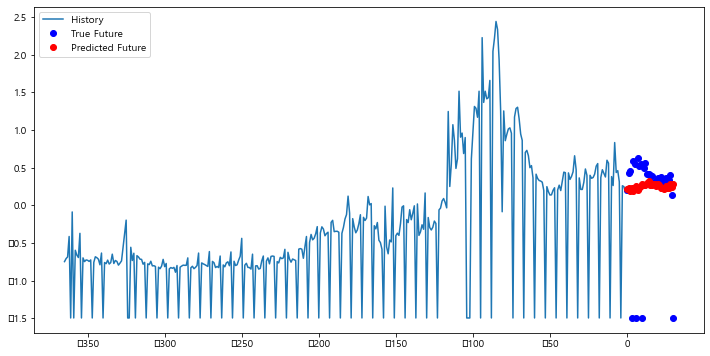

In [85]:
for x, y in val_data_multi.take(10):
    multi_step_plot(x[0], y[0], multi_step_model.predict(x)[0])

In [86]:
# #Test 23
# TRAIN_SPLIT=59

In [87]:
df_pk.corr()

,Unnamed: 0,배추_거래량(kg),배추_가격(원/kg),no,temp,max_Temp,min_Temp,hum,widdir,wind,rain,sun_Time,sun_Qy,condens_Time,gr_Temp,soil_Temp,soil_Wt
Unnamed: 0,1.000000,-0.059285,0.033646,0.015790,0.064688,0.053119,0.068826,0.154235,-0.054984,-0.083230,0.073226,-0.064625,-0.006684,NaN,NaN,0.114962,0.165168
배추_거래량(kg),-0.059285,1.000000,0.252138,0.015925,-0.010180,-0.000316,-0.010757,0.032341,0.047182,-0.049740,-0.014242,-0.031092,-0.123660,NaN,NaN,0.037227,-0.121982
배추_가격(원/kg),0.033646,0.252138,1.000000,0.018045,0.150028,0.131044,0.162368,0.134202,-0.074006,-0.015778,0.080924,-0.009150,0.011722,NaN,NaN,0.177287,0.030237
no,0.015790,0.015925,0.018045,1.000000,0.012904,0.020383,0.005547,-0.013254,0.007302,-0.036345,-0.024027,0.016484,0.028421,NaN,NaN,0.020533,-0.043601
temp,0.064688,-0.010180,0.150028,0.012904,1.000000,0.962245,0.972753,0.479928,-0.454597,-0.240691,0.148466,0.018362,0.333914,NaN,NaN,0.973275,-0.216338
max_Temp,0.053119,-0.000316,0.131044,0.020383,0.962245,1.000000,0.884986,0.383906,-0.433781,-0.355987,0.061584,0.189676,0.479945,NaN,NaN,0.935799,-0.271415
min_Temp,0.068826,-0.010757,0.162368,0.005547,0.972753,0.884986,1.000000,0.550572,-0.435726,-0.153924,0.204123,-0.120415,0.193052,NaN,NaN,0.954073,-0.158232
hum,0.154235,0.032341,0.134202,-0.013254,0.479928,0.383906,0.550572,1.000000,-0.344050,-0.324959,0.342427,-0.528822,-0.394322,NaN,NaN,0.465173,0.164858
widdir,-0.054984,0.047182,-0.074006,0.007302,-0.454597,-0.433781,-0.435726,-0.344050,1.000000,0.196382,-0.139187,0.143536,-0.017217,NaN,NaN,-0.406187,0.074872
wind,-0.083230,-0.049740,-0.015778,-0.036345,-0.240691,-0.355987,-0.153924,-0.324959,0.196382,1.000000,0.145332,-0.068736,-0.087605,NaN,NaN,-0.236285,0.152717


C:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


<AxesSubplot:>

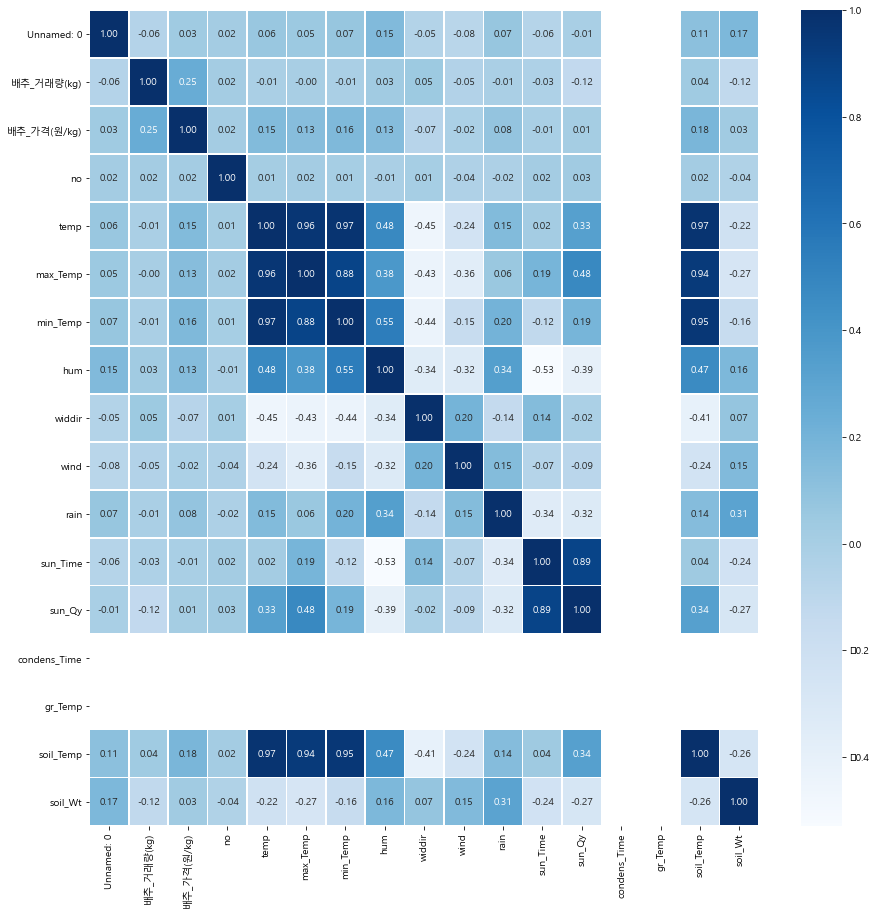

In [88]:
plt.figure(figsize=(15,15))
sns.heatmap(data = df_pk.corr(), annot=True, 
fmt = '.2f', linewidths=.5, cmap='Blues')

In [89]:
df_pekinensis.corr()

,배추_거래량(kg),배추_가격(원/kg),rain_sum_1q,heavy_rain_count_1q,low_temp_count_1q,middle_temp_count_1q,high_temp_count_1q,avg_temp_1q,avg_max_Temp_1q,avg_min_Temp_1q,...,avg_hum_12q,avg_widdir_12q,avg_wind_12q,avg_rain_12q,avg_sun_Time_12q,avg_sun_Qy_12q,avg_condens_Time_12q,avg_gr_Temp_12q,avg_soil_Temp_12q,avg_soil_Wt_12q
배추_거래량(kg),1.000000,0.252138,-0.019194,-0.003209,-0.122560,0.041193,-0.044975,0.088304,0.110742,0.073775,...,0.131083,0.066851,-0.064081,0.044779,-0.216560,-0.243592,NaN,NaN,0.016084,-0.124833
배추_가격(원/kg),0.252138,1.000000,0.207173,0.038390,-0.107155,-0.070671,0.156125,0.200010,0.177203,0.221613,...,0.159573,0.003598,-0.206285,0.250205,-0.137506,-0.091314,NaN,NaN,0.075415,0.173705
rain_sum_1q,-0.019194,0.207173,1.000000,0.719572,-0.522823,0.513938,-0.088546,0.555292,0.510304,0.590243,...,0.434121,-0.332909,-0.370296,0.360122,-0.018389,0.083108,NaN,NaN,0.458605,0.016238
heavy_rain_count_1q,-0.003209,0.038390,0.719572,1.000000,-0.352499,0.394891,-0.026406,0.373520,0.346668,0.397720,...,0.346106,-0.309208,-0.234853,0.211427,-0.047366,0.048624,NaN,NaN,0.386638,-0.178458
low_temp_count_1q,-0.122560,-0.107155,-0.522823,-0.352499,1.000000,-0.745186,-0.158913,-0.924960,-0.935552,-0.901726,...,-0.625136,0.586320,0.634714,-0.408299,-0.080527,-0.327974,NaN,NaN,-0.759628,0.432883
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
avg_sun_Qy_12q,-0.243592,-0.091314,0.083108,0.048624,-0.327974,0.231930,0.061431,0.325396,0.331086,0.300090,...,0.050812,-0.584882,-0.224284,0.096784,0.720756,1.000000,NaN,NaN,0.568443,-0.263347
avg_condens_Time_12q,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
avg_gr_Temp_12q,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
avg_soil_Temp_12q,0.016084,0.075415,0.458605,0.386638,-0.759628,0.574044,0.216403,0.807598,0.800031,0.798702,...,0.770201,-0.876287,-0.678512,0.558553,0.099929,0.568443,NaN,NaN,1.000000,-0.317764


In [90]:
# def weather_feature(temp_df, train2, date_df, allweather, pum, joosan_dict, code_dict, quater_days=30, num_quaters=12) :
#     # 2015년도 일자 추가
#     temp_df = train2[['date',f'{pum}_거래량(kg)', f'{pum}_가격(원/kg)']]
    
#     # 품종과 주산지 날씨 mapping
#     joosanji = joosan_dict[pum]
#     joosan_code = code_dict[joosanji]
#     joosan_weather = allweather[allweather['stn_Code']==joosan_code].reset_index(drop=True)
#     end_index = np.where(joosan_weather['date']=='2020-09-28')[0][0]
#     joosan_weather = joosan_weather.iloc[:end_index+1] #2020-09-28 까지만 자르기
#     temp_df = temp_df.merge(joosan_weather, on='date', how='left') # 배추 거래량 ,배추 가격

#     # weather feature 추가
#     col_list = temp_df.columns[6:]
#     for num in range(1,num_quaters+1) :
#         for index in range(360, len(temp_df)) :
#             temp_quater_df = temp_df.iloc[index-quater_days*num : index-quater_days*(num-1)] #
#             quater_temp = temp_quater_df['temp']
#             temp_df.loc[index, f'rain_sum_{num}q'] = temp_quater_df['rain'].sum() # 누적 강수량
#             temp_df.loc[index, f'heavy_rain_count_{num}q'] = np.where(temp_quater_df['rain']>90, 1, 0).sum() # 평균 강수량 90mm 이상 누적 일수
#             temp_df.loc[index, f'low_temp_count_{num}q'] = np.where(quater_temp<5, 1, 0).sum() # 일평균 기온 5도 이하 누적 일수
#             temp_df.loc[index, f'middle_temp_count_{num}q'] = np.where(((quater_temp>15)&(quater_temp<22)), 1, 0).sum() # 일평균 기온 15~22도 누적 일수
#             temp_df.loc[index, f'high_temp_count_{num}q'] = np.where(quater_temp>32, 1, 0).sum() # 일평균 기온 32도 이상 누적 일수
#             for col in col_list :
#                 temp_df.loc[index, f'avg_{col}_{num}q'] = temp_quater_df[col].mean() # 각 기상 요소의 평균값
    
#     drop_col_list = temp_df.columns[3:19]
#     temp_df = temp_df.drop(drop_col_list, 1).reset_index(drop=True)
#     temp_df = temp_df.iloc[360:].reset_index(drop=True)
    
#     return temp_df

In [91]:
test_dfpk = df_pekinensis.corr()

In [92]:
test_pk_test = test_dfpk[:1]

C:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


<AxesSubplot:>

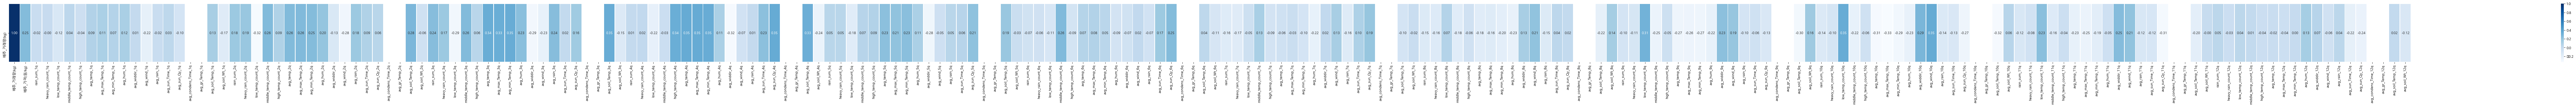

In [94]:
plt.figure(figsize=(150,3))
sns.heatmap(data = test_pk_test, annot=True, 
fmt = '.2f', linewidths=.5, cmap='Blues')

In [95]:
test_pk_stack = pd.DataFrame(test_pk_test.stack())

In [96]:
test_pk_stack.index

MultiIndex([('배추_거래량(kg)',           '배추_거래량(kg)'),
            ('배추_거래량(kg)',          '배추_가격(원/kg)'),
            ('배추_거래량(kg)',          'rain_sum_1q'),
            ('배추_거래량(kg)',  'heavy_rain_count_1q'),
            ('배추_거래량(kg)',    'low_temp_count_1q'),
            ('배추_거래량(kg)', 'middle_temp_count_1q'),
            ('배추_거래량(kg)',   'high_temp_count_1q'),
            ('배추_거래량(kg)',          'avg_temp_1q'),
            ('배추_거래량(kg)',      'avg_max_Temp_1q'),
            ('배추_거래량(kg)',      'avg_min_Temp_1q'),
            ...
            ('배추_거래량(kg)',     'avg_max_Temp_12q'),
            ('배추_거래량(kg)',     'avg_min_Temp_12q'),
            ('배추_거래량(kg)',          'avg_hum_12q'),
            ('배추_거래량(kg)',       'avg_widdir_12q'),
            ('배추_거래량(kg)',         'avg_wind_12q'),
            ('배추_거래량(kg)',         'avg_rain_12q'),
            ('배추_거래량(kg)',     'avg_sun_Time_12q'),
            ('배추_거래량(kg)',       'avg_sun_Qy_12q'),
            ('배추_거래량(kg)',    'avg_soil_Temp_12q

In [97]:
test_pk_stack.rename(columns = {0 :"rela" }, inplace = True)

In [137]:
df_or = test_pk_stack['rela'] > 0.3

In [138]:
df_columns_rela = df_or.loc[df_or==True]

In [139]:
df_columns_rela_df = pd.DataFrame(df_columns_rela)

In [140]:
df_columns_rela_df.index

MultiIndex([('배추_거래량(kg)',         '배추_거래량(kg)'),
            ('배추_거래량(kg)',        'avg_temp_3q'),
            ('배추_거래량(kg)',    'avg_max_Temp_3q'),
            ('배추_거래량(kg)',    'avg_min_Temp_3q'),
            ('배추_거래량(kg)',   'avg_soil_Temp_3q'),
            ('배추_거래량(kg)', 'high_temp_count_4q'),
            ('배추_거래량(kg)',        'avg_temp_4q'),
            ('배추_거래량(kg)',    'avg_max_Temp_4q'),
            ('배추_거래량(kg)',    'avg_min_Temp_4q'),
            ('배추_거래량(kg)',      'avg_sun_Qy_4q'),
            ('배추_거래량(kg)',   'avg_soil_Temp_4q'),
            ('배추_거래량(kg)',  'low_temp_count_9q'),
            ('배추_거래량(kg)', 'low_temp_count_10q'),
            ('배추_거래량(kg)',       'avg_wind_10q')],
           )

In [126]:
df_columns_rela_df

rela
배추_거래량(kg) 배추_거래량(kg)            True
           배추_가격(원/kg)           True
           middle_temp_count_2q  True
           avg_temp_2q           True
           avg_max_Temp_2q       True
           avg_min_Temp_2q       True
           avg_soil_Temp_2q      True
           rain_sum_3q           True
           middle_temp_count_3q  True
           avg_temp_3q           True
           avg_max_Temp_3q       True
           avg_min_Temp_3q       True
           avg_hum_3q            True
           avg_rain_3q           True
           avg_soil_Temp_3q      True
           high_temp_count_4q    True
           avg_temp_4q           True
           avg_max_Temp_4q       True
           avg_min_Temp_4q       True
           avg_sun_Time_4q       True
           avg_sun_Qy_4q         True
           avg_soil_Temp_4q      True
           avg_temp_5q           True
           avg_max_Temp_5q       True
           avg_min_Temp_5q       True
           avg_sun_Qy_5q         True
           middle_temp_count_6q  True
           avg_sun_Qy_6q         True
           avg_wind_8q           True
           low_temp_count_9q     True
           avg_widdir_9q         True
           low_temp_count_10q    True
           avg_widdir_10q        True
           avg_wind_10q          True
           low_temp_count_11q    True
           avg_widdir_11q        True
           avg_wind_11q          True

In [127]:
test_pk_stack

rela
배추_거래량(kg) 배추_거래량(kg)           1.000000
           배추_가격(원/kg)          0.252138
           rain_sum_1q         -0.019194
           heavy_rain_count_1q -0.003209
           low_temp_count_1q   -0.122560
...                                  ...
           avg_rain_12q         0.044779
           avg_sun_Time_12q    -0.216560
           avg_sun_Qy_12q      -0.243592
           avg_soil_Temp_12q    0.016084
           avg_soil_Wt_12q     -0.124833

[194 rows x 1 columns]

In [141]:
df_columns_rela_df.index

MultiIndex([('배추_거래량(kg)',         '배추_거래량(kg)'),
            ('배추_거래량(kg)',        'avg_temp_3q'),
            ('배추_거래량(kg)',    'avg_max_Temp_3q'),
            ('배추_거래량(kg)',    'avg_min_Temp_3q'),
            ('배추_거래량(kg)',   'avg_soil_Temp_3q'),
            ('배추_거래량(kg)', 'high_temp_count_4q'),
            ('배추_거래량(kg)',        'avg_temp_4q'),
            ('배추_거래량(kg)',    'avg_max_Temp_4q'),
            ('배추_거래량(kg)',    'avg_min_Temp_4q'),
            ('배추_거래량(kg)',      'avg_sun_Qy_4q'),
            ('배추_거래량(kg)',   'avg_soil_Temp_4q'),
            ('배추_거래량(kg)',  'low_temp_count_9q'),
            ('배추_거래량(kg)', 'low_temp_count_10q'),
            ('배추_거래량(kg)',       'avg_wind_10q')],
           )

In [156]:
df_penkinesis_sample = df_pekinensis[['date','avg_temp_3q','배추_거래량(kg)','avg_max_Temp_3q','avg_min_Temp_3q', 'avg_soil_Temp_3q','high_temp_count_4q','avg_temp_4q','avg_max_Temp_4q','avg_min_Temp_4q','avg_sun_Qy_4q','avg_soil_Temp_4q','low_temp_count_9q','low_temp_count_10q','avg_wind_10q']]

In [157]:
df_penkinesis_sample

,date,avg_temp_3q,배추_거래량(kg),avg_max_Temp_3q,avg_min_Temp_3q,avg_soil_Temp_3q,high_temp_count_4q,avg_temp_4q,avg_max_Temp_4q,avg_min_Temp_4q,avg_sun_Qy_4q,avg_soil_Temp_4q,low_temp_count_9q,low_temp_count_10q,avg_wind_10q
0,2016-01-01,21.860000,0.0,25.610000,19.150000,23.234667,0.0,21.546667,26.733333,17.086667,18.613333,22.296667,29.0,30.0,0.683333
1,2016-01-02,22.083333,80860.0,25.936667,19.360000,23.347333,0.0,21.630000,26.820000,17.176667,18.720000,22.422667,29.0,30.0,0.676667
2,2016-01-03,22.250000,0.0,26.090000,19.560000,23.474667,0.0,21.716667,26.936667,17.363333,18.810000,22.528000,29.0,30.0,0.683333
3,2016-01-04,22.420000,1422742.5,26.203333,19.790000,23.589333,0.0,21.770000,26.870000,17.486667,18.440000,22.635667,29.0,30.0,0.663333
4,2016-01-05,22.693333,1167241.0,26.560000,20.020000,23.724667,0.0,21.736667,26.780000,17.496667,18.310000,22.719000,29.0,30.0,0.626667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1728,2020-09-24,21.710000,1856965.0,25.516667,18.823333,23.187333,0.0,21.003333,26.506667,16.203333,19.173333,21.657333,29.0,30.0,0.646667
1729,2020-09-25,21.660000,1880095.5,25.456667,18.766667,23.183667,0.0,21.146667,26.640000,16.423333,19.180000,21.811000,29.0,30.0,0.636667
1730,2020-09-26,21.620000,1661090.9,25.383333,18.803333,23.166667,0.0,21.353333,26.733333,16.710000,18.906667,21.985333,29.0,30.0,0.656667
1731,2020-09-27,21.686667,25396.0,25.386667,18.963333,23.170667,0.0,21.503333,26.776667,16.973333,18.923333,22.156000,29.0,30.0,0.716667


In [158]:
#features_considered = ['배추_거래량(kg)', '배추_가격(원/kg)', 'min_Temp', 'rain']
features = df_penkinesis_sample[['avg_temp_3q','배추_거래량(kg)','avg_max_Temp_3q','avg_min_Temp_3q', 'avg_soil_Temp_3q','high_temp_count_4q','avg_temp_4q','avg_max_Temp_4q','avg_min_Temp_4q','avg_sun_Qy_4q','avg_soil_Temp_4q','low_temp_count_9q','low_temp_count_10q','avg_wind_10q']]
features.index = df_penkinesis_sample['date']
print(features.head())

            avg_temp_3q  배추_거래량(kg)  avg_max_Temp_3q  avg_min_Temp_3q  \
date                                                                    
2016-01-01    21.860000         0.0        25.610000            19.15   
2016-01-02    22.083333     80860.0        25.936667            19.36   
2016-01-03    22.250000         0.0        26.090000            19.56   
2016-01-04    22.420000   1422742.5        26.203333            19.79   
2016-01-05    22.693333   1167241.0        26.560000            20.02   

            avg_soil_Temp_3q  high_temp_count_4q  avg_temp_4q  \
date                                                            
2016-01-01         23.234667                 0.0    21.546667   
2016-01-02         23.347333                 0.0    21.630000   
2016-01-03         23.474667                 0.0    21.716667   
2016-01-04         23.589333                 0.0    21.770000   
2016-01-05         23.724667                 0.0    21.736667   

            avg_max_Temp_4q  avg

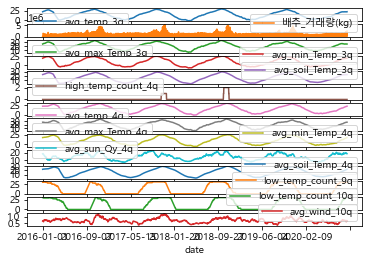

In [159]:
plt.rcParams['font.family'] = 'Malgun Gothic'
features.plot(subplots=True)
plt.show()

In [160]:
features = features.astype(float)
features.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1733 entries, 2016-01-01 to 2020-09-28
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   avg_temp_3q         1733 non-null   float64
 1   배추_거래량(kg)          1733 non-null   float64
 2   avg_max_Temp_3q     1733 non-null   float64
 3   avg_min_Temp_3q     1733 non-null   float64
 4   avg_soil_Temp_3q    1733 non-null   float64
 5   high_temp_count_4q  1733 non-null   float64
 6   avg_temp_4q         1733 non-null   float64
 7   avg_max_Temp_4q     1733 non-null   float64
 8   avg_min_Temp_4q     1733 non-null   float64
 9   avg_sun_Qy_4q       1733 non-null   float64
 10  avg_soil_Temp_4q    1733 non-null   float64
 11  low_temp_count_9q   1733 non-null   float64
 12  low_temp_count_10q  1733 non-null   float64
 13  avg_wind_10q        1733 non-null   float64
dtypes: float64(14)
memory usage: 203.1+ KB


In [161]:
BATCH_SIZE = 10  # 몇 개의 샘플로 가중치를 결정할 것인지
BUFFER_SIZE = 50
EVALUATION_INTERVAL = 100 # 10던계 훈련
EPOCHS = 50 # 전체 데이터 셋을 몇번 반복할 것인지

In [162]:
TRAIN_SPLIT = 1000
tf.random.set_seed(10)

In [163]:
#Z-score 표준화
dataset = features.values
data_mean = dataset[:TRAIN_SPLIT].mean(axis=0)
data_std = dataset[:TRAIN_SPLIT].std(axis=0)
dataset = (dataset-data_mean)/data_std


In [164]:
dataset

array([[ 0.82828696, -1.36131432,  0.60402688, ...,  1.41031336,
         1.49521386, -0.17728297],
       [ 0.85329225, -1.2654601 ,  0.64146037, ...,  1.41031336,
         1.49521386, -0.21471072],
       [ 0.87195291, -1.36131432,  0.65903119, ...,  1.41031336,
         1.49521386, -0.17728297],
       ...,
       [ 0.80141561,  0.60779977,  0.57805262, ...,  1.41031336,
         1.49521386, -0.32699395],
       [ 0.80887987, -1.33120903,  0.5784346 , ...,  1.41031336,
         1.49521386,  0.00985576],
       [ 0.82828696,  1.48971665,  0.60402688, ...,  1.41031336,
         1.49521386, -0.17728297]])

In [165]:
def multivariate_data(dataset, target, start_index, end_index, history_size,
                      target_size, step, single_step=False):
  data = []
  labels = []

  start_index = start_index + history_size
  if end_index is None:
    end_index = len(dataset) - target_size

  for i in range(start_index, end_index):
    indices = range(i-history_size, i, step)
    data.append(dataset[indices])

    if single_step:
      labels.append(target[i+target_size])
    else:
      labels.append(target[i:i+target_size])

  return np.array(data), np.array(labels)

In [166]:
past_history = 365
future_target = 7
STEP = 1

x_train_single, y_train_single = multivariate_data(dataset, dataset[:, 1], 0,
                                                   TRAIN_SPLIT, past_history,
                                                   future_target, STEP,
                                                   single_step=True)
x_val_single, y_val_single = multivariate_data(dataset, dataset[:, 1],TRAIN_SPLIT, 
                                               None, past_history,
                                               future_target, STEP,
                                               single_step=True)

In [167]:
print('Single window of past history : {}'.format(x_train_single[0].shape))

Single window of past history : (365, 14)


In [168]:
# Use Customizing Function
train_data_single = tf.data.Dataset.from_tensor_slices((x_train_single, y_train_single))
train_data_single = train_data_single.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE).repeat()
# Dataset -> Tensor
val_data_single = tf.data.Dataset.from_tensor_slices((x_val_single, y_val_single))
val_data_single = val_data_single.batch(BATCH_SIZE).repeat()
# Build the Single Step Model
single_step_model = tf.keras.models.Sequential()
single_step_model.add(tf.keras.layers.LSTM(32, input_shape=x_train_single.shape[-2:]))
single_step_model.add(tf.keras.layers.Dense(1))
single_step_model.compile(optimizer=tf.keras.optimizers.RMSprop(), loss='mae')

for x, y in val_data_single.take(1):
    print(single_step_model.predict(x).shape)

(10, 1)


In [170]:
BATCH_SIZE = 10  # 몇 개의 샘플로 가중치를 결정할 것인지
BUFFER_SIZE = 50
EVALUATION_INTERVAL = 100 # 10던계 훈련
EPOCHS = 50 # 전체 데이터 셋을 몇번 반복할 것인지

Epoch 1/50
100/100 [==============================] - 6s 61ms/step - loss: 0.4270 - val_loss: 1.2524
Epoch 2/50
100/100 [==============================] - 6s 58ms/step - loss: 0.3960 - val_loss: 1.1476
Epoch 3/50
100/100 [==============================] - 6s 58ms/step - loss: 0.4196 - val_loss: 1.2256
Epoch 4/50
100/100 [==============================] - 6s 61ms/step - loss: 0.3754 - val_loss: 1.1645
Epoch 5/50
100/100 [==============================] - 6s 61ms/step - loss: 0.4064 - val_loss: 1.1912
Epoch 6/50
100/100 [==============================] - 6s 61ms/step - loss: 0.3743 - val_loss: 1.1821
Epoch 7/50
100/100 [==============================] - 6s 60ms/step - loss: 0.3893 - val_loss: 1.2768
Epoch 8/50
100/100 [==============================] - 6s 59ms/step - loss: 0.3745 - val_loss: 1.2165
Epoch 9/50
100/100 [==============================] - 6s 57ms/step - loss: 0.3607 - val_loss: 1.2162
Epoch 10/50
100/100 [==============================] - 6s 62ms/step - loss: 0.3599 - val_lo

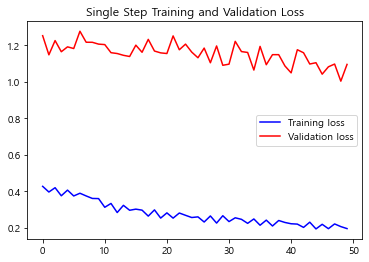

In [171]:
# Train the Model
single_step_history = single_step_model.fit(train_data_single, epochs=EPOCHS,
                                            steps_per_epoch=EVALUATION_INTERVAL,
                                            validation_data=val_data_single,
                                            validation_steps=10)


def plot_train_history(history, title):
    plt.rcParams['font.family'] = 'Malgun Gothic'
    loss = history.history['loss']
    val_loss = history.history['val_loss']
 
    epochs = range(len(loss))

    plt.figure()

    plt.plot(epochs, loss, 'b', label='Training loss') # 지금 데이터에 얼마나 잘맞는지
    plt.plot(epochs, val_loss, 'r', label='Validation loss') # 새 데이터에 얼마나 잘맛는지

    plt.title(title)
    plt.legend()

    plt.show()

plot_train_history(single_step_history,
                   'Single Step Training and Validation Loss')

C:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


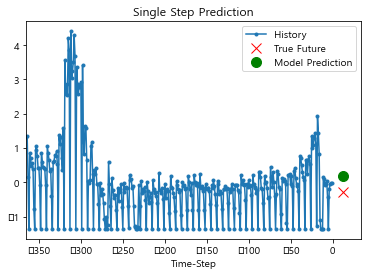

C:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


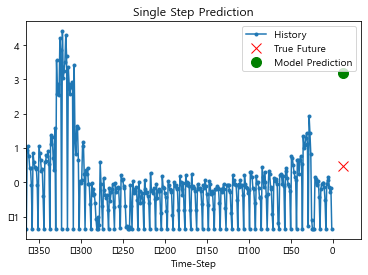

C:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


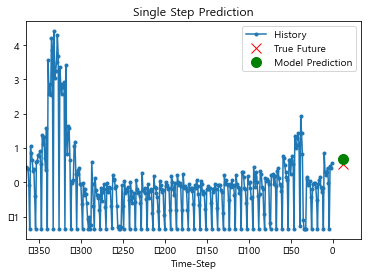

C:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


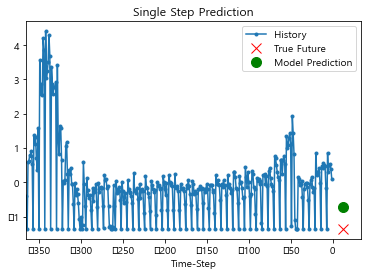

In [172]:
for x, y in val_data_single.take(4):
    plot = show_plot([x[0][:, 1].numpy(), y[0].numpy(),
                      single_step_model.predict(x)[0]], 12,
                     'Single Step Prediction')
    plt.rcParams['font.family'] = 'Malgun Gothic'
    plot.show()

In [173]:
past_history = 365
future_target = 31
STEP = 1

x_train_multi, y_train_multi = multivariate_data(dataset, dataset[:, 1], 0,
                                                 TRAIN_SPLIT, past_history, future_target, STEP)
x_val_multi, y_val_multi = multivariate_data(dataset, dataset[:, 1],
                                             TRAIN_SPLIT, None, past_history, future_target, STEP)

print('Single window of past history : {}'.format(x_train_multi[0].shape)) # 365일 24시간
print('\n Target temperature to predict : {}'.format(y_train_multi[0].shape)) # 31일 예측 데이터

Single window of past history : (365, 14)

 Target temperature to predict : (31,)


In [174]:
train_data_multi = tf.data.Dataset.from_tensor_slices((x_train_multi, y_train_multi))
train_data_multi = train_data_multi.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE).repeat()

val_data_multi = tf.data.Dataset.from_tensor_slices((x_val_multi, y_val_multi))
val_data_multi = val_data_multi.batch(BATCH_SIZE).repeat()

In [175]:
def multi_step_plot(history, true_future, prediction):
    plt.figure(figsize=(12,6))
    num_in = create_time_steps(len(history))
    num_out = len(true_future)
    
    plt.plot(num_in, np.array(history[:,1]), label='History')
    plt.plot(np.arange(num_out)/STEP, np.array(true_future),'bo', label='True Future')
    
    if prediction.any():
        plt.plot(np.arange(num_out)/STEP, np.array(prediction), 'ro', label='Predicted Future')
    plt.legend(loc='upper left')
    plt.show()

C:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


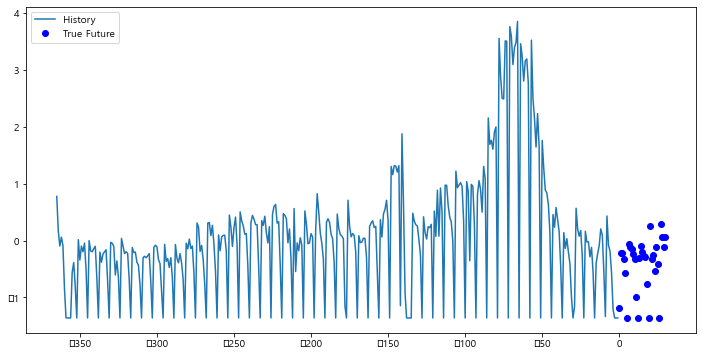

In [176]:
for x, y in train_data_multi.take(1):
    multi_step_plot(x[0], y[0], np.array([0]))

In [177]:
multi_step_model = tf.keras.models.Sequential()
multi_step_model.add(tf.keras.layers.LSTM(32,
                                         return_sequences = True,
                                         input_shape=x_train_multi.shape[-2:]))
multi_step_model.add(tf.keras.layers.LSTM(16, activation='relu'))
multi_step_model.add(tf.keras.layers.Dense(31))

multi_step_model.compile(optimizer=tf.keras.optimizers.RMSprop(clipvalue=1.0), loss='mae')

In [178]:
for x,y in val_data_multi.take(1):
    print(multi_step_model.predict(x).shape)

(10, 31)


In [179]:
BATCH_SIZE = 10  # 몇 개의 샘플로 가중치를 결정할 것인지   # 몇 문항을 풀고해답을 마추는지
BUFFER_SIZE = 50
EVALUATION_INTERVAL = 100                                 
EPOCHS = 50 # 전체 데이터 셋을 몇번 반복할 것인지    

In [180]:
multi_step_history = multi_step_model.fit(train_data_multi, epochs=EPOCHS,
                                          steps_per_epoch=EVALUATION_INTERVAL,
                                          validation_data=val_data_multi,
                                          validation_steps=10)
                                         

Epoch 1/50
100/100 [==============================] - 12s 110ms/step - loss: 0.6464 - val_loss: 1.0181
Epoch 2/50
100/100 [==============================] - 11s 114ms/step - loss: 0.5628 - val_loss: 0.8967
Epoch 3/50
100/100 [==============================] - 11s 114ms/step - loss: 0.5920 - val_loss: 1.0246
Epoch 4/50
100/100 [==============================] - 11s 114ms/step - loss: 0.5291 - val_loss: 0.8885
Epoch 5/50
100/100 [==============================] - 12s 124ms/step - loss: 0.5656 - val_loss: 1.2516
Epoch 6/50
100/100 [==============================] - 11s 112ms/step - loss: 0.5270 - val_loss: 0.9312
Epoch 7/50
100/100 [==============================] - 11s 108ms/step - loss: 0.5541 - val_loss: 0.8879
Epoch 8/50
100/100 [==============================] - 11s 108ms/step - loss: 0.5401 - val_loss: 1.0770
Epoch 9/50
100/100 [==============================] - 11s 108ms/step - loss: 0.5233 - val_loss: 0.9233
Epoch 10/50
100/100 [==============================] - 11s 111ms/step - l

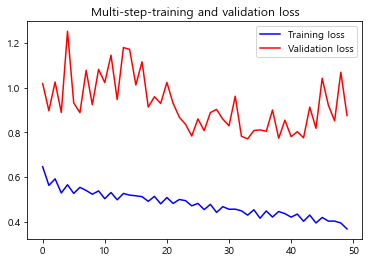

In [181]:
plot_train_history(multi_step_history, "Multi-step-training and validation loss")

C:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


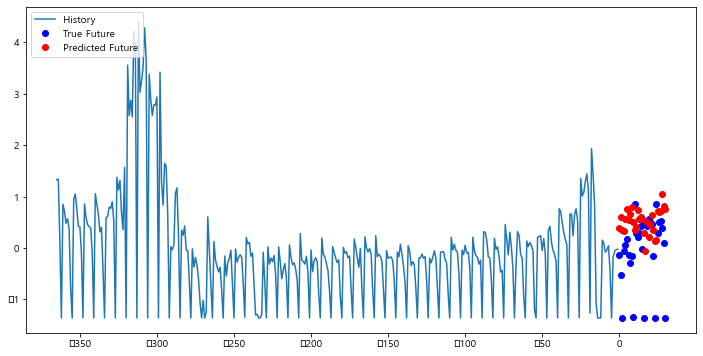

C:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


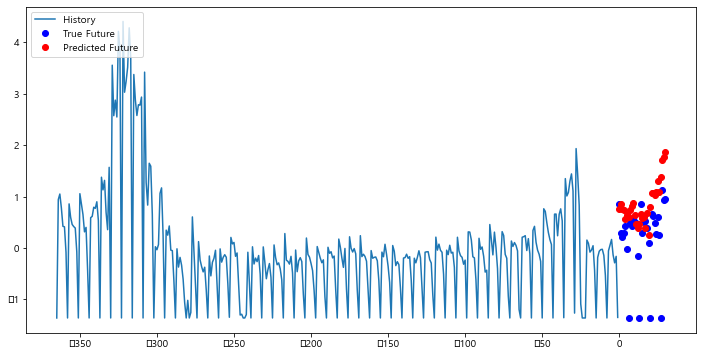

C:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


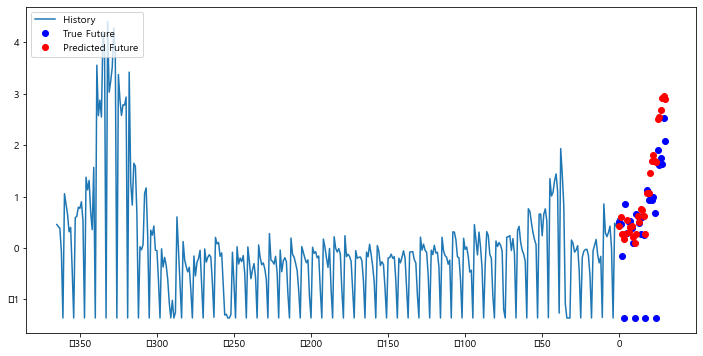

C:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


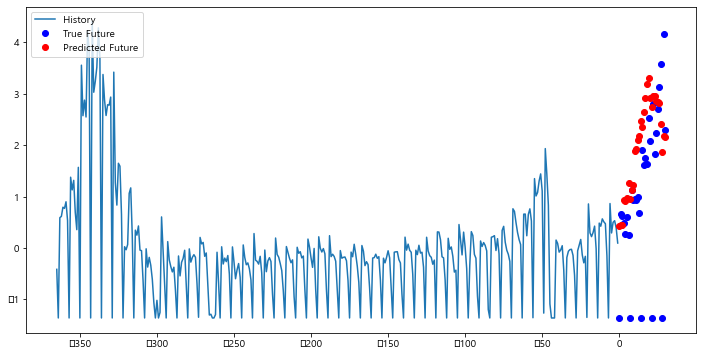

C:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


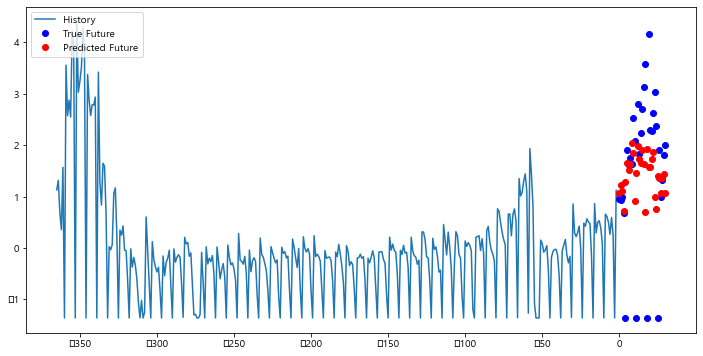

C:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


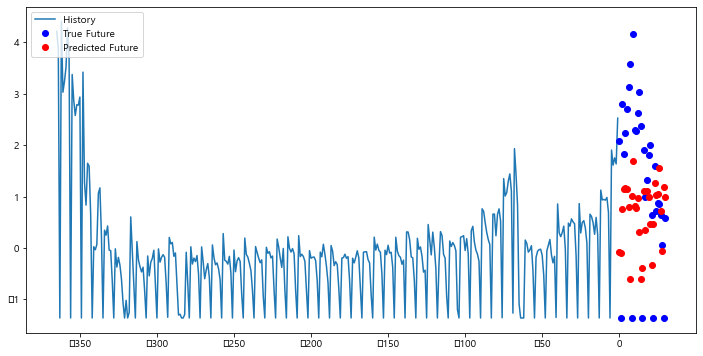

C:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


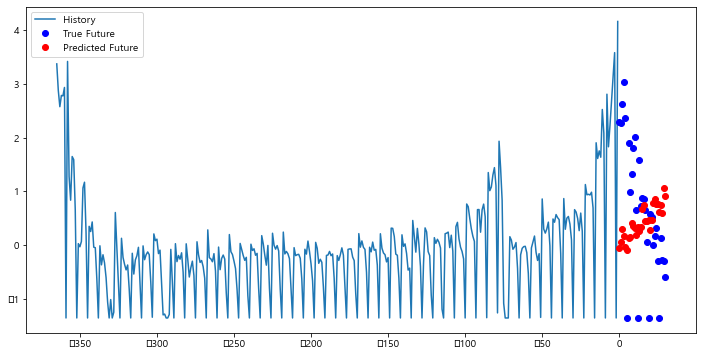

C:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


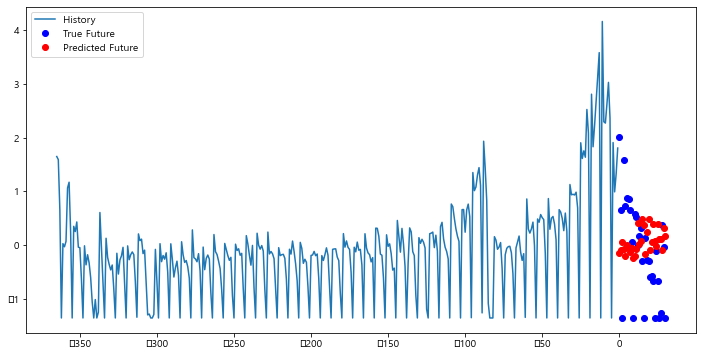

C:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


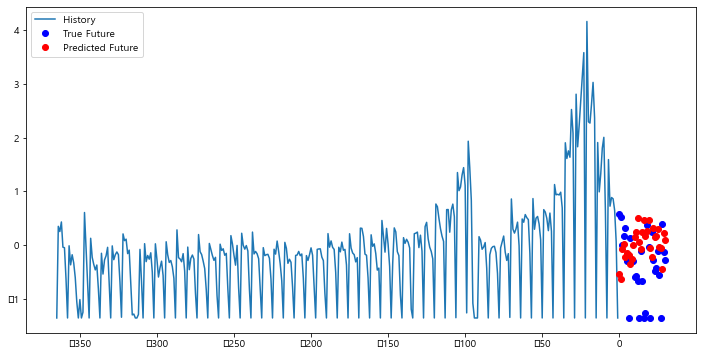

C:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


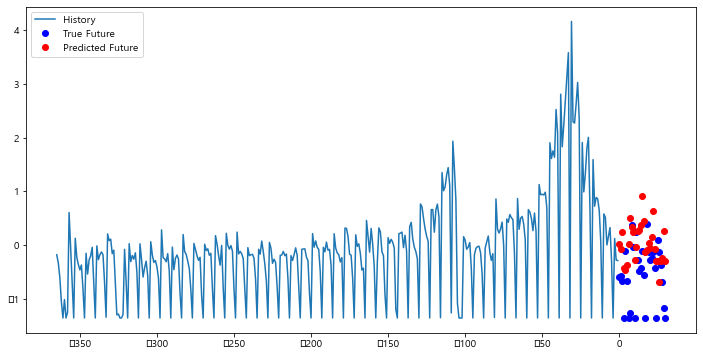

In [182]:
for x, y in val_data_multi.take(10):
    multi_step_plot(x[0], y[0], multi_step_model.predict(x)[0])

In [102]:
#single step model  step_size를 기반으로 과거 고나측치를 샘플링

In [103]:
# 지난 5일동안의 데이터, 매 시간마다 720개의 관측치의 표시
#샘플링은 1시감나다 수행
#120개의 관측치는 5일의 이력을 나타낸다
#single step model의 경우 12시간 온도를 예측

# past_history는 지난 5일간의 데이터입니다. (720 = 5일 * 144개, 144 = 6개 * 24시간)

# future_target은 72시간 스텝 이후 (12시간)를 예측할 것임을 의미합니다.

# STEP은 샘플링 간격을 의미합니다.

In [104]:
# 9월 ~ 11월 배추 출하

In [105]:
# 이전의 선행 연구결과들을 보면 Lee(1996)는 9월과 11월의
# 기온 상승이 가을배추의 단위당 생산량(kg/10a)을 증가시키는
# 요인으로 작용하는데, 그 이유로 11월의 기온 상승효과는 이
# 시기의 동해나 서리피해를 줄일 수 있기 때문이라고 설명하
# 였고, 강수량의 경우 10월 이전의 강수량은 대체로 가을배추
# 의 단위당 생산량을 감소시키고, 10월 이후의 강수량은 증가
# 시킨다고 하였다. Cho et al.(2013)은 8∼11월 최고기온과 강
# 수량을 이용하여 가을배추의 단위당 생산량을 추정한 결과, 8
# ∼11월 최고기온 모두 단위당 생산량을 감소시킨다고 하였으
# 며, 강수량의 경우 9∼10월의 강수량은 단위당 생산량을 감소
# 시키지만, 11월 강수량은 증가시킨다고 보고한 바 있다. 선행 연구결과와 본 연구를 종합해 보면, 평균기온의 증가
# 는 대체로 가을배추의 단위당 생산량을 증가시키는 것으로
# 나타났고, 본 연구 사용된 변수 중 10월의 최고기온과 최저기
# 온의 차이는 가을배추의 단위당 생산량을 증가시키며, 11월
# 의 최고기온과 최저기온의 차이는 단위당 생산량을 감소시키
# 는 것으로 나타났다. 그렇지만, 강수량의 경우 선행 연구결과
# 와 달리 본 연구에서는 영향을 미치지 않는 것으로 나타나, 추
# 가 연구가 필요할 것으로 예상된다.

In [ ]:
joosan_weather